In [614]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fft, fftfreq, fftshift, ifft, ifftshift
from scipy.integrate import simpson
import pandas as pd
from tqdm import tqdm
import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image
import io
import sympy as sy
from sympy import sin, cos, exp

# Oppgave 1

### 1)

C:\Users\Jervt\AppData\Local\Temp\ipykernel_9076\1378500088.py:8: RuntimeWarning: divide by zero encountered in log
  return theta_c/2*(1-u**2)+theta/2*((1-u)*np.log((1-u)/2)+(1+u)*np.log((1+u)/2))
C:\Users\Jervt\AppData\Local\Temp\ipykernel_9076\1378500088.py:8: RuntimeWarning: invalid value encountered in multiply
  return theta_c/2*(1-u**2)+theta/2*((1-u)*np.log((1-u)/2)+(1+u)*np.log((1+u)/2))
C:\Users\Jervt\AppData\Local\Temp\ipykernel_9076\1378500088.py:11: RuntimeWarning: divide by zero encountered in divide
  return -theta_c*u+theta/2*np.log((1+u)/(1-u))
C:\Users\Jervt\AppData\Local\Temp\ipykernel_9076\1378500088.py:11: RuntimeWarning: divide by zero encountered in log
  return -theta_c*u+theta/2*np.log((1+u)/(1-u))


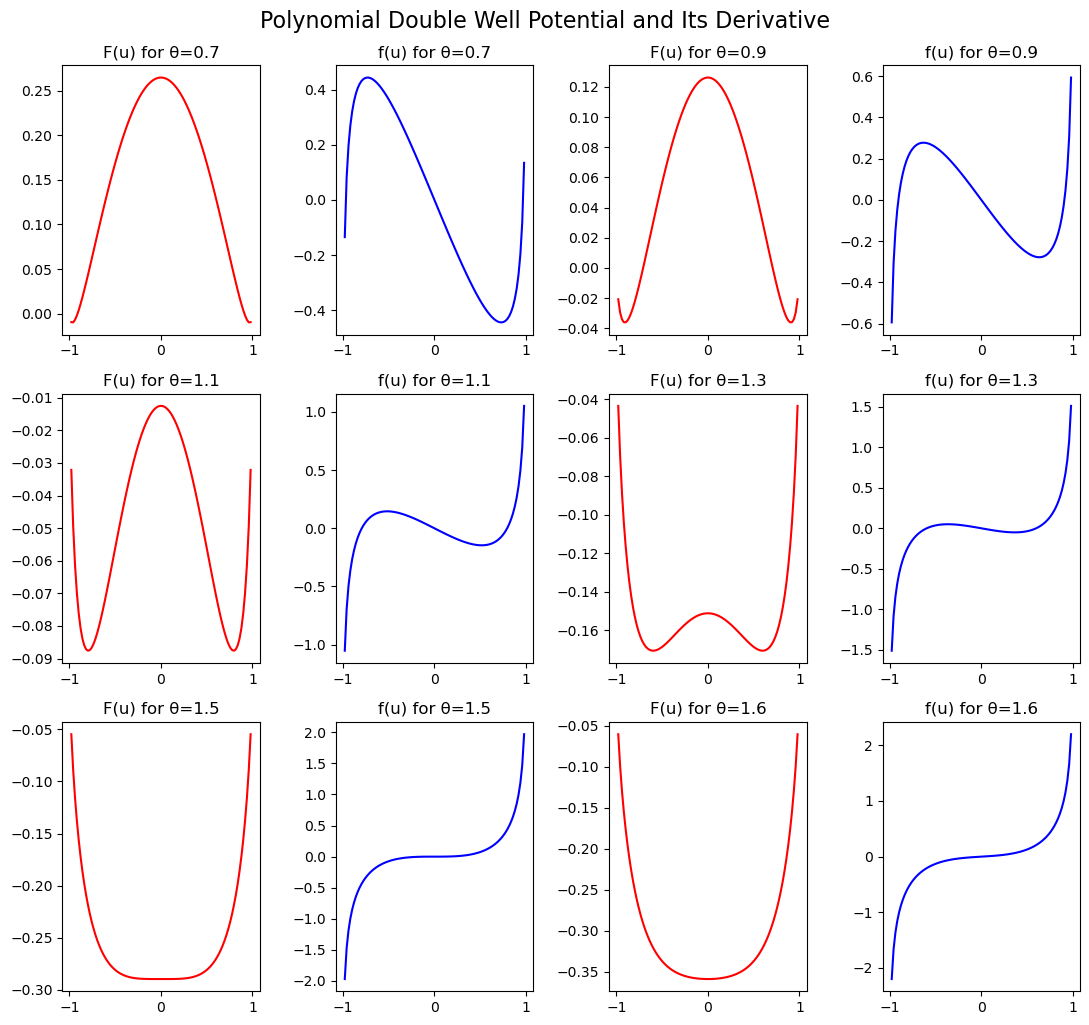

In [611]:
# %matplotlib widget

#Critical temperature
theta_c = 1.5 
theta = [0.7,0.9,1.1,1.3,1.5,1.6]
#Logarithmic potential
def F(u, theta):
    return theta_c/2*(1-u**2)+theta/2*((1-u)*np.log((1-u)/2)+(1+u)*np.log((1+u)/2))
#The derivative of logarithmic potential
def f(u, theta):
    return -theta_c*u+theta/2*np.log((1+u)/(1-u))

x = np.linspace(-1, 1, 100)

fig, axs = plt.subplots(3, 4, figsize=(11, 10))

#Plotting the functions
for i in range(len(theta)):
    #Plotting F(u)
    axs[i//2,(i%2)*2].plot(x, F(x, theta[i]), "r", label='F(u)')
    axs[i//2,(i%2)*2].set_title(f'F(u) for θ={theta[i]}')

    #Plotting F'(u)
    axs[i//2,(i%2)*2+1].plot(x, f(x, theta[i]), "b", label='f(u)')
    axs[i//2,(i%2)*2+1].set_title(f'f(u) for θ={theta[i]}')


plt.tight_layout()
plt.suptitle("Polynomial Double Well Potential and Its Derivative", fontsize=16, y=1.02)
plt.show()


It can be observed that $F(u)$ has mostly positive values in first two cases and resembles a wave function for $\theta$ values lower than 1.3. Later on, however, it flattens out and resembles a second order function of the form $ax^{2}+bx+c$ with positive $a$, negative $c$ and $b=0$. This implies that a stable equlubrium can be achived around $u = 0$  for $\theta$ values higher that $\theta_c$. Maximum points for the derivative are bigger for higher temperatures, which means that logarithmic potential changes rapidly at endpoints. 

### 2)

The following set of equations shows that the Cahn-Hilliard equation is invariant under the transformation $u \mapsto -u$, i.e. if $u(\boldsymbol{x},t)$ is a solution, then $-u(\boldsymbol{x},t)$ is also a solution.

We start with the difinition of the Cahn-Hilliard equation in a given domain.

$u_t - \nabla\cdot(\it{M}\nabla(f(u)-\kappa\Delta u))=0$

We know that $ \frac{\delta(-u)}{\delta t} =-u_t$ and $\Delta(-u) = -\Delta u$, so we focus on finding out expression for $f(-u)$:

$
f(u) = -\theta_{c}u+\frac{\theta}{2}\ln(\frac{1+u}{1-u})\\\\
$
$
f(-u) = \theta_{c}u+\frac{\theta}{2}\ln(\frac{1-u}{1+u})\\\\
$
$
f(-u) = \theta_{c}u+\frac{\theta}{2}\ln((\frac{1+u}{1-u})^{-1})\\\\
$
$
f(-u) = \theta_{c}u-\frac{\theta}{2}\ln(\frac{1+u}{1-u}) = -(-\theta_{c}u+\frac{\theta}{2}\ln(\frac{1+u}{1-u})) = -f(u)
$

Which then can be combined into $$-u_t - \nabla\cdot(\it{M}\nabla(-f(u)+\kappa\Delta u))= -(u_t - \nabla\cdot(\it{M}\nabla(f(u)-\kappa\Delta u)))=0$$

Which proves that the Cahn-Hilliard equation is invariant since the equation equals 0 in both cases.

### 3)

Cahn-Hilliard: $\frac{\partial u}{\partial t} = \nabla\cdot(M\nabla\mu)$

$\frac{d}{dt}\int_\Omega u(\vec{x},t)d\vec{x} = \int_\Omega\frac{d}{dt}u(\vec{x},t)d\vec{x} = \int_\Omega\nabla\cdot(M\nabla\mu)d\vec{x} = \int_\Omega\nabla\cdot(M\nabla\mu)d\vec{x}$

Delvis integrasjon:

$u = 1 \implies u' = 0$, $v' = \nabla\cdot(M\nabla\mu) \implies v = \int_\Omega\nabla\cdot(M\nabla\mu)d\vec{x}$

Divergensteoremet:

$\int_\Omega\nabla\cdot(M\nabla\mu)d\vec{x} = \oint_C M\nabla\mu\cdot\hat{N}ds$, der $C$ er kurven som omslutter $\Omega$ og $\hat{N}$ er en enhetsnormal ut fra denne.

$\implies \frac{d}{dt}\int_\Omega u(\vec{x},t)d\vec{x} = 1\cdot\oint M\nabla\mu\cdot\hat{N}ds - \int_\Omega\left(0\cdot\oint_C M\nabla\mu\cdot\hat{N}ds\right)d\vec{x} = \oint_C M\nabla\mu\cdot\hat{N}ds$

Et lukket linjeintegral av en gradient er null: $\oint_C(\nabla F)\cdot\hat{N}dl = 0$

$\implies \frac{d}{dt}\int_\Omega u(\vec{x},t)d\vec{x} = \oint_C M\nabla\mu\cdot\hat{N}ds = 0$

Altså skal ikke massen endre seg over tid.

# Oppgave 2

### 2)

The following code contains a function biharmonic_solver that takes inn 2D arrays of X, Y, and F which represents the equation on a given grid. The domain and its side lengths can have different values before they're put into the function. The function then transforms F and runs a spectral derivative method to find a numerical solution. User defined mean value is the average value of the exact solution.

The errors are [3165.45171007151, 23.652206487369874, 0.5136363649564768, 6.106226635438361e-15, 5.728750807065808e-14, 7.616129948928574e-14]
EOC between N=4 and N=8: 7.0643
EOC between N=8 and N=15: 6.0923
EOC between N=15 and N=16: 496.8076
EOC between N=16 and N=20: -10.0329
EOC between N=20 and N=32: -0.6059
Surface plots for N_x = 15:


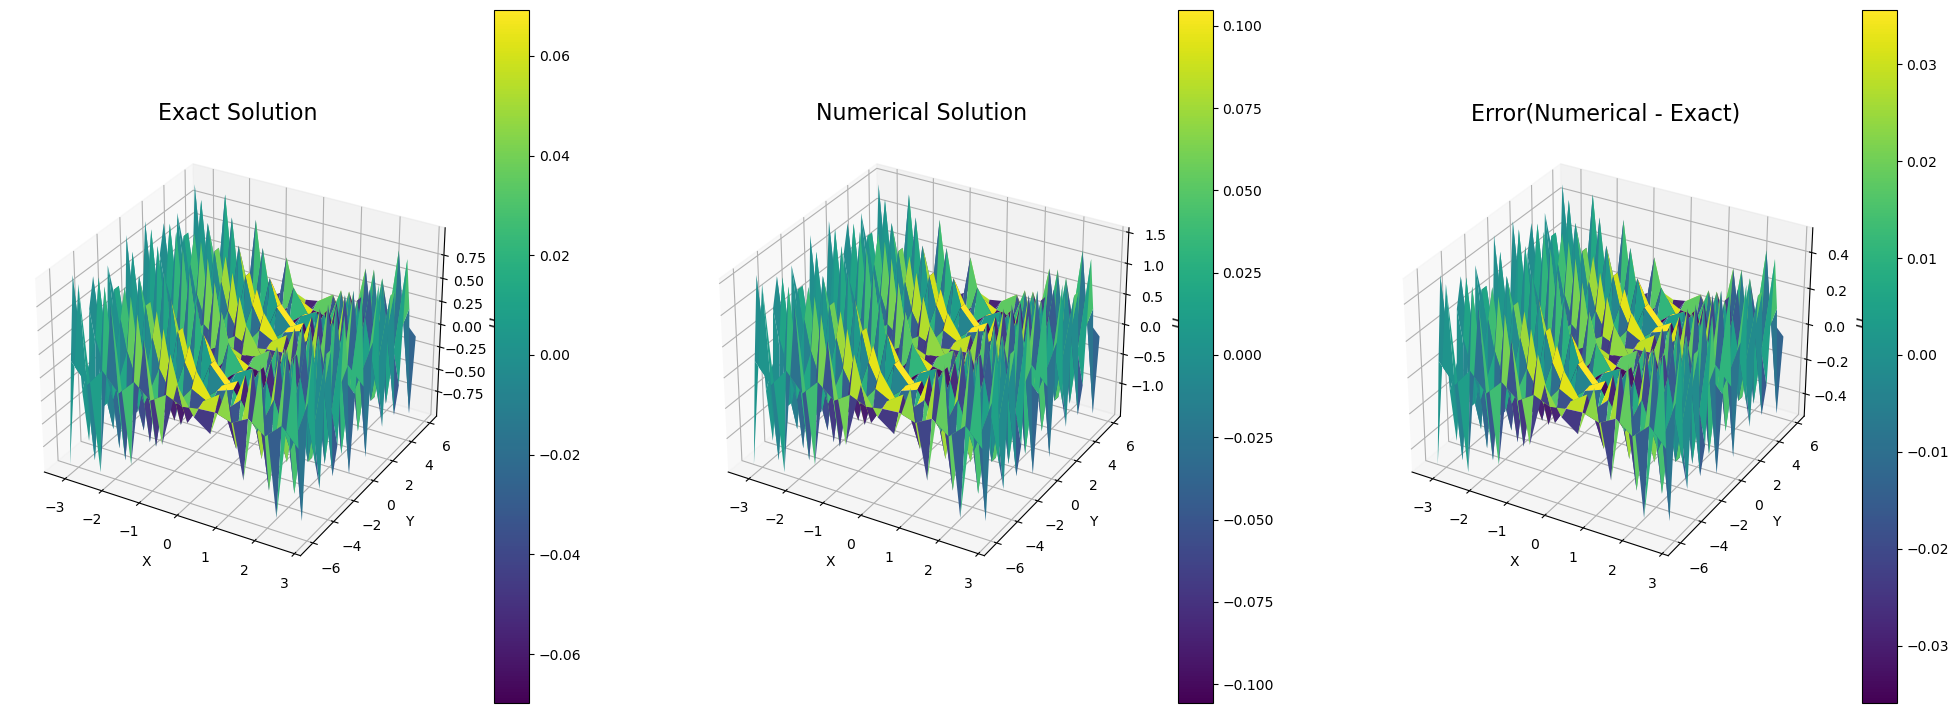

In [615]:
#Symbolic variables for x, y, and c are needed for the exact solution
x, y, c = sy.symbols('x y c')

#Symbolic Biharmonic operator
laplace = lambda u: sy.diff(u, x, x) + sy.diff(u, y, y)

#Exact solution
def u_ex(x, y):
    return np.sin(8*(x-1))*np.cos(4*y)

#Symbolic exact solution
u_symbol = sin(8*(x-1))*cos(4*y)
f_symbol = laplace(laplace(u_symbol))+c*u_symbol
f = sy.lambdify((x, y, c), f_symbol, modules='numpy')

c=1

#A solver function that takes inn 2D arrays of X, Y, and F which represents the equation on a given grid. mean is the average of the exact solution for correction.  
def biharmonic_solver(X, Y, F, c, mean=0.0):
    #The Fourier transform of the input function F
    F_hat = fft2(F)
    #The wave numbers for the x and y directions
    kx = fftfreq(X.shape[1], d=(X[0, 1] - X[0, 0]))*2*np.pi
    ky = fftfreq(Y.shape[0], d=(Y[1, 0] - Y[0, 0]))*2*np.pi
    KX, KY = np.meshgrid(kx, ky, sparse=True)
    #The wave numbers raised to the fourth power
    K2 = (KX**2 + KY**2)**2
    #Avoiding divition by 0
    K2[0, 0] = 1
    #Fourier transform of the solution
    U_hat = F_hat / (c+K2)
    #Set the zero frequency component to zero if c is very small. Tolerance is chosen to be 0.00001, which is resonable.
    if c < 0.00001*np.min(KX)**4:
        U_hat[0, 0] = 0
    U = ifft2(U_hat).real
    #Adjust the mean of the solution if c is small
    if c < 0.00001*np.min(KX)**4:
        U -= np.mean(U) - mean
    return U


N_values = [4, 8, 15, 16, 20, 32]  # Different amount of points
errors = []
for N_x in N_values:
    #Number of points in the y direction
    N_y = N_x * 2
    #Other grid lengths can be chosen, but for this exersice they are:
    L_x = 2 * np.pi
    L_y = 4 * np.pi
    X_points = np.linspace(-L_x / 2, L_x / 2, N_x, endpoint=False)
    Y_points = np.linspace(-L_y / 2, L_y / 2, N_y, endpoint=False)
    X, Y = np.meshgrid(X_points, Y_points)
    #The right-hand side of the biharmonic equation
    F = f(X,Y,1)
    #Exact solution of a grid
    U_ex = u_ex(X, Y)
    #The average value
    average = np.average(U_ex)
    U_num = biharmonic_solver(X, Y, F, c=1, mean=average)
    error = np.max(np.abs(U_num - U_ex))
    errors.append(error)
    #Handling the case of N_x = 15
    if N_x == 15:
        X_15 = X
        Y_15= Y
        U_Num_15 = U_num
        U_ex_15 = u_ex(X, Y)
    #Handling the case of N_x = 16
    elif N_x == 16:
        X_16 = X
        Y_16= Y
        U_Num_16 = U_num
        U_ex_16 = u_ex(X, Y)
        




print(f'The errors are {errors}')
#store the order of convergence
EOC = []
#Calculate the order of convergence between runs
for i in range(1, len(errors)):
    eoc = -np.log(errors[i-1] / errors[i]) / np.log(N_values[i-1] / N_values[i])
    EOC.append(eoc)

for i in range(len(EOC)):
    print(f"EOC between N={N_values[i]} and N={N_values[i+1]}: {EOC[i]:.4f}")

print("Surface plots for N_x = 15:")

fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(131, projection='3d')
surf = ax.plot_surface(X_15, Y_15, U_ex_15, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')
ax.set_title("Exact Solution", fontsize=16)


ax = fig.add_subplot(132, projection='3d')
surf = ax.plot_surface(X_15, Y_15, U_Num_15, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')
ax.set_title("Numerical Solution", fontsize=16)


ax = fig.add_subplot(133, projection='3d')
surf = ax.plot_surface(X_15, Y_15, U_Num_15-U_ex_15, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')
ax.set_title("Error(Numerical - Exact)", fontsize=16)
plt.show()



We see a dramatic spike in EOC between $N_{x} = 15$ and $N_{x} = 16$ which results in a machine presition error of order $10^{-15}$ for the latter amount of sampling points. It might be a consecounce of both expected and numerical solutions scaling down to the same level of $10^{-15}$ as well as combination of increased resolutionand improved numerical stability. It can be observed that while the error surface plot for $N_{x} = 15$ resembles both solutions almost identically, That is not the case for $N_{x} = 16$. The error is noticably smaller around negative values of $x$, particularly around $x=-2$.

Surface plots for N_x = 16:


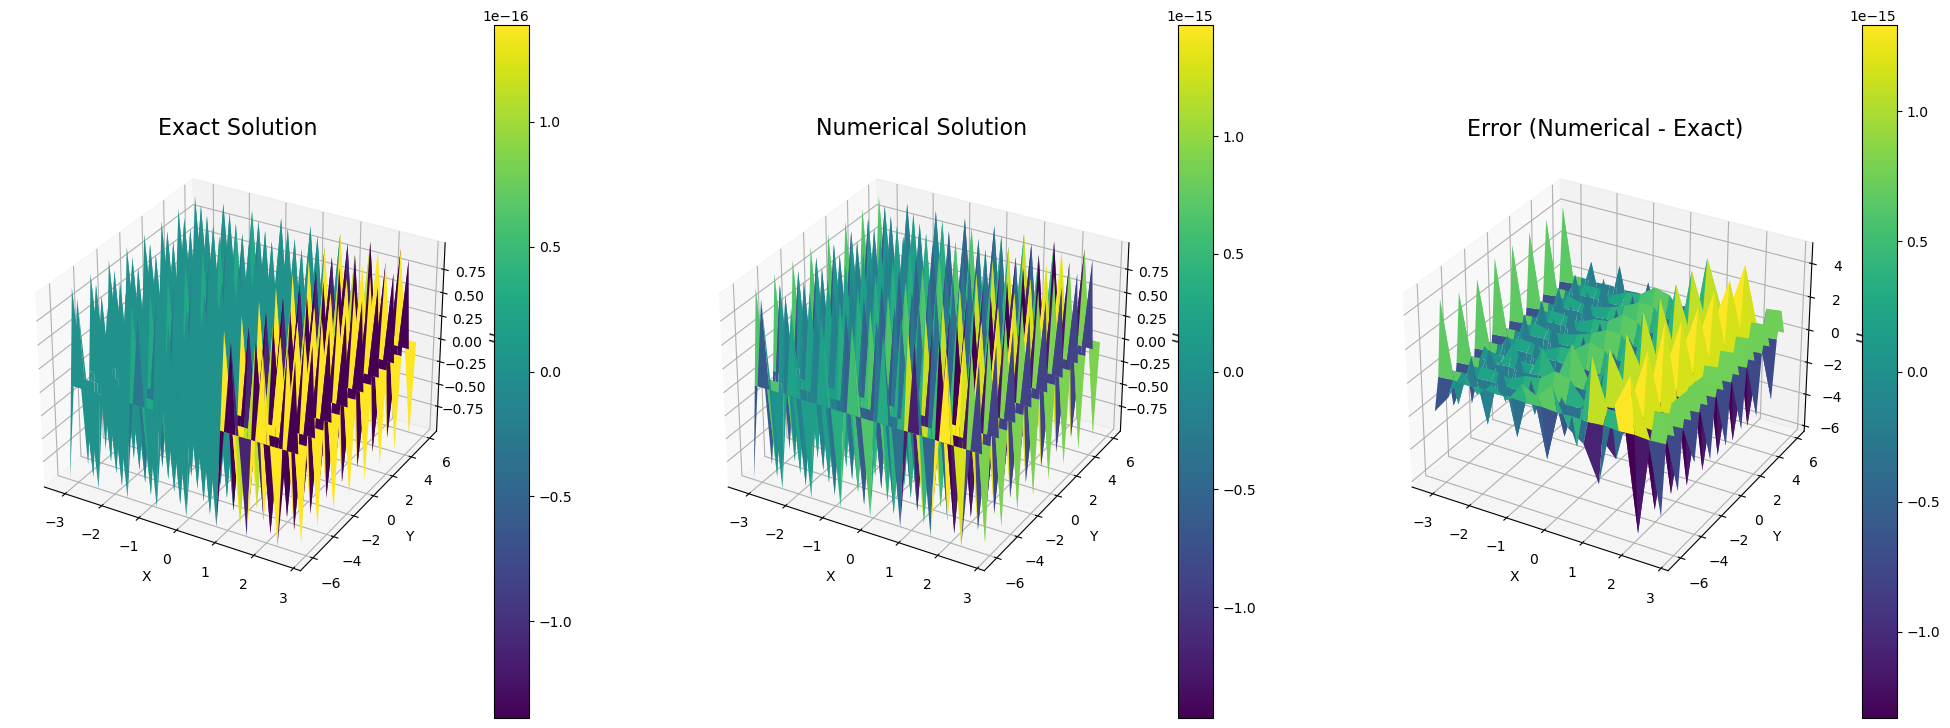

In [616]:
print("Surface plots for N_x = 16:")
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(131, projection='3d')
surf = ax.plot_surface(X_16, Y_16, U_ex_16, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')
ax.set_title("Exact Solution", fontsize=16)


ax = fig.add_subplot(132, projection='3d')
surf = ax.plot_surface(X_16, Y_16, U_Num_16, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')
ax.set_title("Numerical Solution", fontsize=16)



ax = fig.add_subplot(133, projection='3d')
surf = ax.plot_surface(X_16, Y_16, U_Num_16-U_ex_16, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')
ax.set_title("Error (Numerical - Exact)", fontsize=16)
plt.show()

the errors are [20.241044014191313, 10.623049174589891, 0.9844063493774078, 0.03462556441129827, 0.0009929320044053114, 3.601908866368575e-05, 1.5070640229097876e-06, 6.3138020145459e-08, 2.5305686435217467e-09, 9.627232344655567e-11]
EOC between N=4 and N=8: 0.9301
EOC between N=8 and N=12: 5.8667
EOC between N=12 and N=16: 11.6359
EOC between N=16 and N=20: 15.9166
EOC between N=20 and N=24: 18.1910
EOC between N=24 and N=28: 20.5895
EOC between N=28 and N=32: 23.7592
EOC between N=32 and N=36: 27.3119
EOC between N=36 and N=40: 31.0270
Surface plots for N_x = 32:


Text(0.5, 0.92, 'Error (Numerical - Exact)')

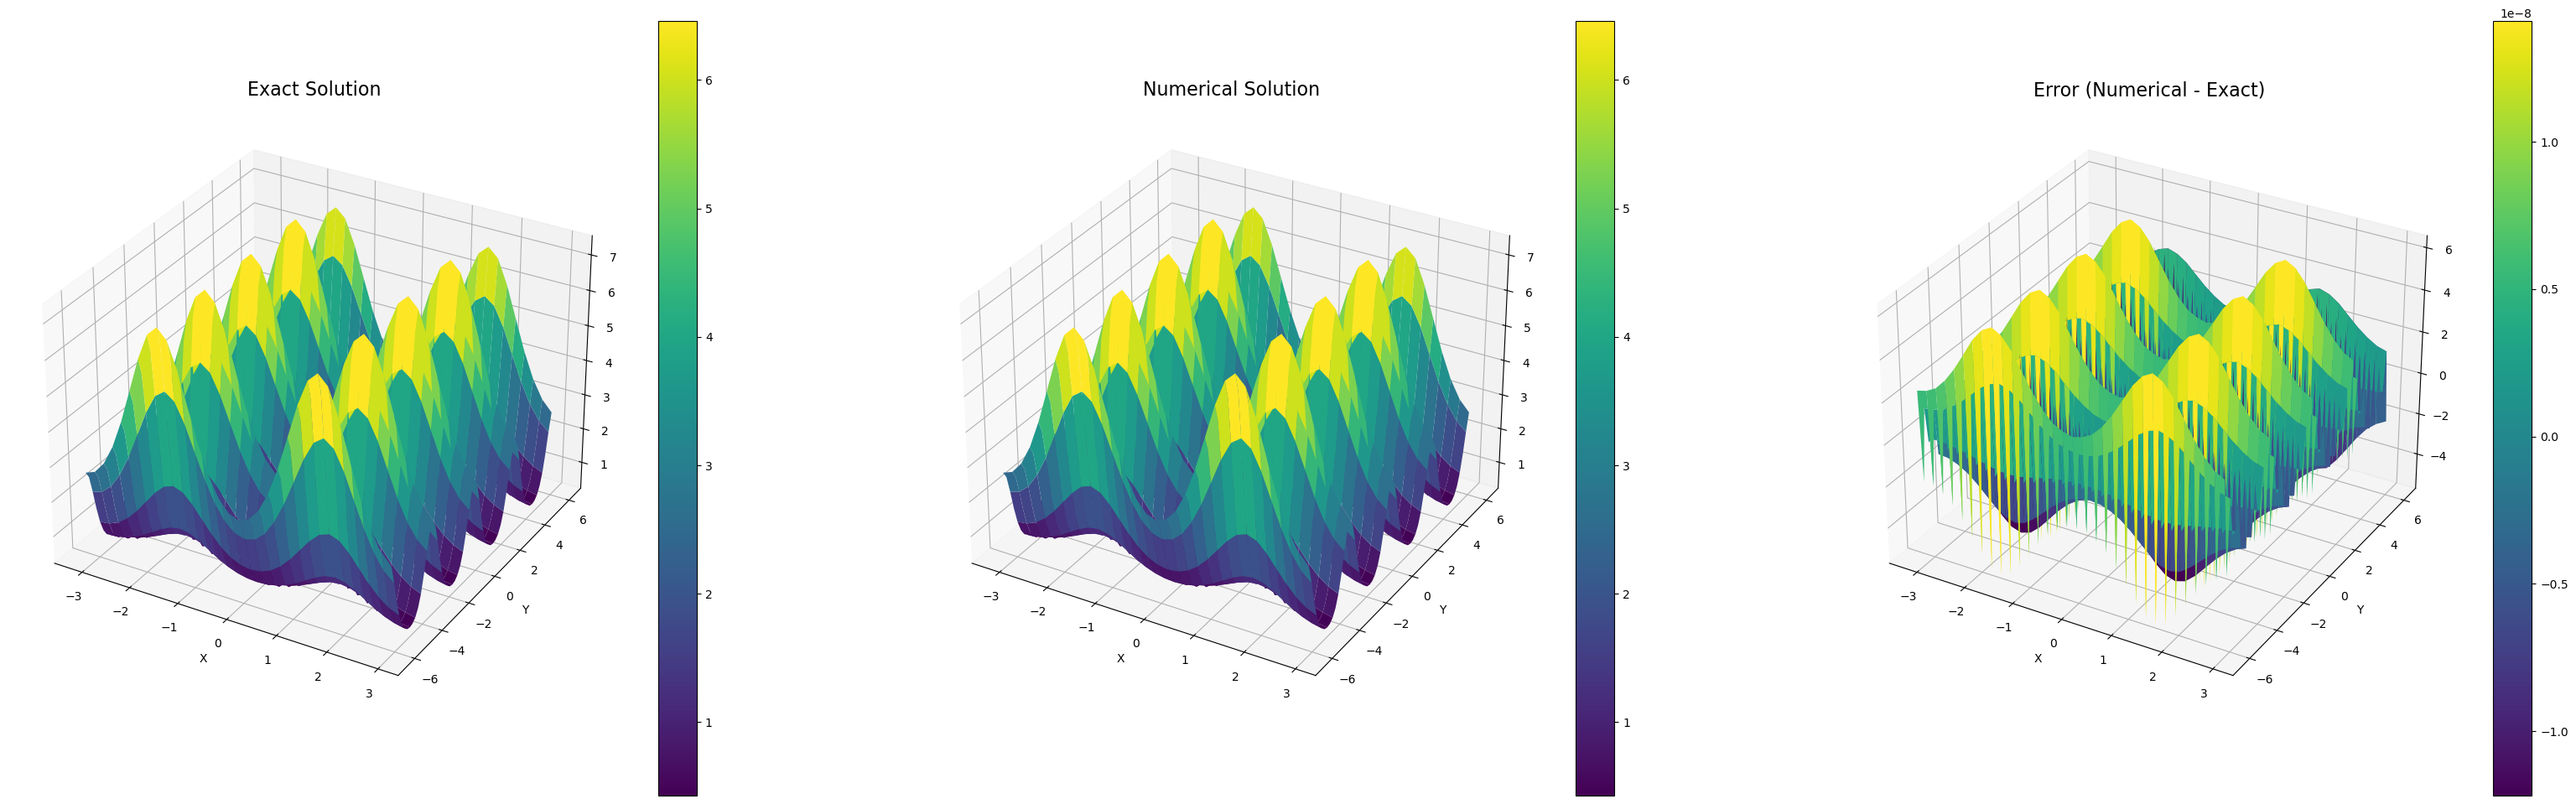

In [619]:
#Symbolic variables for x, y are needed for the exact solution
x, y = sy.symbols('x y')
laplace = lambda u: sy.diff(u, x, x) + sy.diff(u, y, y)

#Exact solution
def u_ex(x, y):
    return np.e**(np.sin(x)**2+np.cos(2*y))

#Symbolic exact solution
u_symbol = exp(sin(x)**2+cos(2*y))
f_symbol = laplace(laplace(u_symbol))

f = sy.lambdify((x, y), f_symbol, modules='numpy')

c=0

#A solver function that takes inn 2D arrays of X, Y, and F which represents the equation on a given grid. mean is the average of the exact solution for correction.  
def biharmonic_solver(X, Y, F, c, mean=0.0):
    #The Fourier transform of the input function F
    F_hat = fft2(F)
    #The wave numbers for the x and y directions
    kx = fftfreq(X.shape[1], d=(X[0, 1] - X[0, 0]))*2*np.pi
    ky = fftfreq(Y.shape[0], d=(Y[1, 0] - Y[0, 0]))*2*np.pi
    KX, KY = np.meshgrid(kx, ky, sparse=True)
    #The wave numbers raised to the fourth power
    K2 = (KX**2 + KY**2)**2
    #Avoiding divition by 0
    K2[0, 0] = 1
    #Fourier transform of the solution
    U_hat = F_hat / (c+K2)
    #Set the zero frequency component to zero if c is very small. Tolerance is chosen to be 0.00001, which is resonable.
    if c < 0.00001*np.min(KX)**4:
        U_hat[0, 0] = 0
    U = ifft2(U_hat).real
    #Adjust the mean of the solution if c is small
    if c < 0.00001*np.min(KX)**4:
        U -= np.mean(U) - mean
    return U


#Amount of sampling points for x
N_values = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
errors = []
for N_x in N_values:
    N_y = N_x * 2
    L_x = 2 * np.pi
    L_y = 4 * np.pi
    X_points = np.linspace(-L_x / 2, L_x / 2, N_x, endpoint=False)
    Y_points = np.linspace(-L_y / 2, L_y / 2, N_y, endpoint=False)
    X, Y = np.meshgrid(X_points, Y_points)
    F= f(X,Y)
    U_ex = u_ex(X, Y)
    average = np.average(U_ex)
    U_num = biharmonic_solver(X, Y, F, c, mean=average)
    error = np.max(np.abs(U_num - U_ex))
    errors.append(error)
    if N_x == 32:
        X_32 = X
        Y_32 = Y
        U_Num_32 = U_num
        U_ex_32 = u_ex(X, Y)


print(f'the errors are {errors}')
EOC = []
for i in range(1, len(errors)):
    eoc = np.log(errors[i-1] / errors[i]) / np.log(N_values[i] / N_values[i-1])
    EOC.append(eoc)

for i in range(len(EOC)):
    print(f"EOC between N={N_values[i]} and N={N_values[i+1]}: {EOC[i]:.4f}")


print("Surface plots for N_x = 32:")
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(131, projection='3d')
surf = ax.plot_surface(X_32, Y_32, U_ex_32, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Exact Solution", fontsize=16)


ax = fig.add_subplot(132, projection='3d')
surf = ax.plot_surface(X_32, Y_32, U_Num_32, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Numerical Solution", fontsize=16)



ax = fig.add_subplot(133, projection='3d')
surf = ax.plot_surface(X_32, Y_32, U_Num_32-U_ex_32, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Error (Numerical - Exact)", fontsize=16)

The error surface has similar pattern as both of the solutions. It can be observed that the error drops exponentially as $N_{x}$ rises. It didn't reach machine presition, but it is worth noticing that both of the surface plots have shape many orders of magnitude bigger than the error at $N_{32}$. That leads to the conclusion that the biharmonic_solver has a high degree of accuracy when provided with enough sampling data. When the amount of sampling points is low, the error will be quite substantial. The amount of samplings points needed to reach smallest error possible and most precice numerical solution seem to be dependant on $u$ and constant coeffitient $c$, since biharmonic_solver is the same for both of the tests.

# Oppgave 3

## Teori:

### 1)

The θ-method is defined as,

$$
y_{n+1} = y_n + h \left[ (1 - \theta) f(t_n, y_n) + \theta f(t_{n+1}, y_{n+1}) \right].
$$

This equals,

$$
y_{n+1} = y_n + h(1 - \theta) f(t_n, y_n) + h\theta f(t_{n+1}, y_{n+1}).
$$

Whereas a two-stage Runge-Kutta (RK) method has the general form,

$$
k_1 = f(t_n, y_n)
$$

$$
k_2 = f(t_n + a_{21}h, y_n + a_{21}h k_1)
$$

$$
y_{n + 1} =  y_n + h(\beta_1 k_1 + \beta_2 k_2)
$$

Which equals,

$$
y_{n + 1} =  y_n + h\beta_1 k_1 + h\beta_2 k_2
$$

We see already that the first part ($y_n + h\beta_1 k_1$) in the RK-method is equal to the corresponding part of the θ-method, assuming that $(1 - \theta) = \beta_1$. 

The latter part $h\theta f(t_{n+1}, y_{n+1})$ requires a bit more work.

To rewrite this part of the θ-method, we define:

$$
k_2 = f(t_n + h, y_n + h k_1),
$$

assuming that we approximate $y_{n+1}$ using an Euler-type predictor:

$$
y_{n+1} \approx y_n + h k_1.
$$

Substituting this into the θ-method gives an explicit two-stage Runge-Kutta method:

$$
y_{n+1} = y_n + h(1 - \theta) f(t_n, y_n) + h\theta f(t_n + h, y_n + h f(t_n, y_n)).
$$

So, the θ-method can be approximated by the following two-stage RK method:

$$
\begin{aligned}
k_1 &= f(t_n, y_n), \\
k_2 &= f(t_n + h, y_n + h k_1), \\
y_{n+1} &= y_n + h\left((1 - \theta)k_1 + \theta k_2\right).
\end{aligned}
$$

---

### Butcher Table

The Butcher table for this method is:

$$
\begin{array}{c|cc}
0   & 0   & 0 \\
1   & 1   & 0 \\
\hline
    & 1 - \theta & \theta \\
\end{array}
$$

Where:
- $$( a_{21} = 1 )$$
- $$( c_1 = 0 ), ( c_2 = 1 )$$
- $$( b_1 = 1 - \theta ), ( b_2 = \theta )$$

This table represents an explicit two-stage Runge-Kutta method that approximates the θ-method for general $( \theta \in [0, 1])$.

---

### Special Cases

| θ       | Method              | Notes                        |
|---------|---------------------|------------------------------|
| 0       | Explicit Euler       | First-order accurate         |
| 0.5     | Heun's Method (RK2)  | Second-order, trapezoidal rule |
| 1       | Euler predictor for Backward Euler | Approximation only (not implicit) |


### 2)

In [620]:
def plot_stability(r, xlim, ylim, resolution=500):
    
    x = np.linspace(xlim[0], xlim[1], resolution)
    y = np.linspace(ylim[0], ylim[1], resolution)
    X, Y = np.meshgrid(x,y)
    Z = X + 1j*Y
    
    R = np.abs(r(Z))
    
    plt.figure(figsize=(5,5))
    plt.contourf(X, Y, R, levels=[0,1], colors=['blue'], alpha=0.5)
    plt.contour(X, Y, R, levels=[1], colors=['black'])
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.title(f'Stabilitetsområde, $θ = {θ}$')
    plt.grid(); plt.show()
    
def r(z):
    return (1+(1-θ)*z)/(1-θ*z)

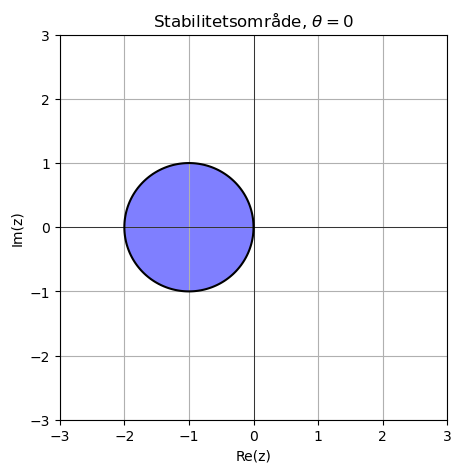

In [219]:
θ = 0

plot_stability(r, xlim=(-3,3), ylim=(-3,3))

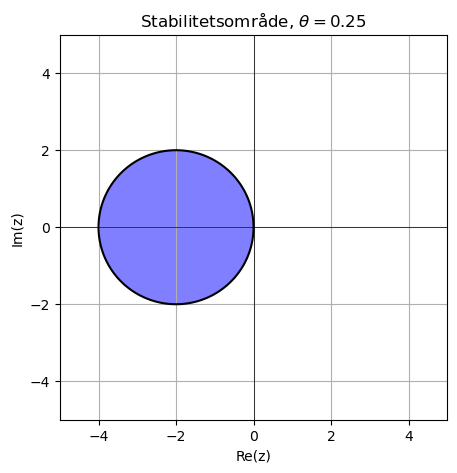

In [220]:
θ = 0.25

plot_stability(r, xlim=(-5,5), ylim=(-5,5))

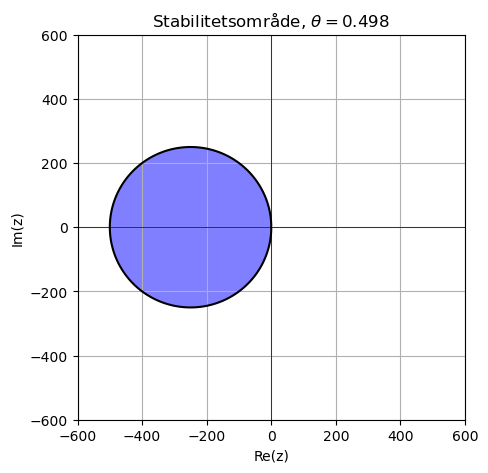

In [221]:
θ = 0.498

plot_stability(r, xlim=(-600,600), ylim=(-600,600))

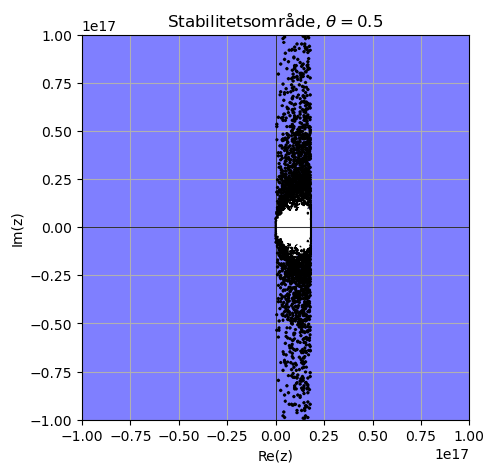

In [222]:
θ = 0.5

plot_stability(r, xlim=(-1e17,1e17), ylim=(-1e17,1e17))

Comment: there appears to be some computational error for this plot. The expected result is that the area to the left of the imaginary axis should be stable, whereas the area to the right of the imaginary axis should not.

Since the left of the imaginary axis is stable for this $\theta$ value, it appears that the $\theta$-method is A-stable for $\theta = 0.5$

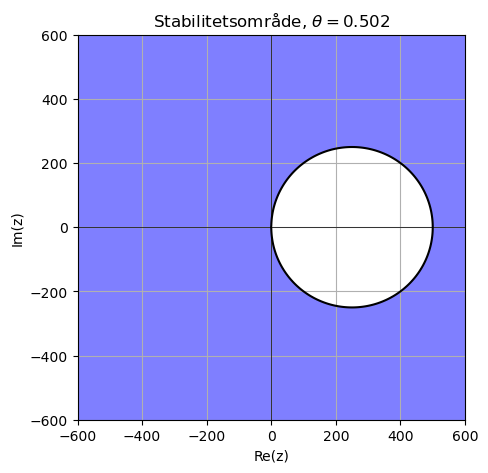

In [223]:
θ = 0.502

plot_stability(r, xlim=(-600,600), ylim=(-600,600))

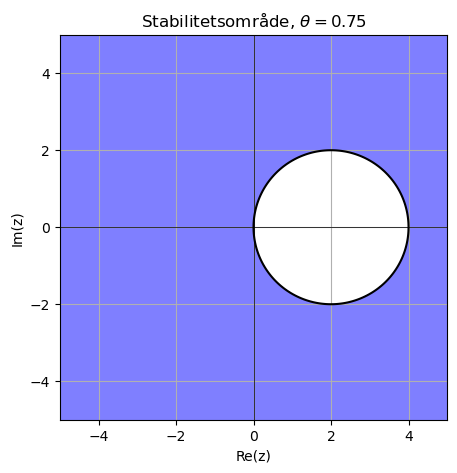

In [224]:
θ = 0.75

plot_stability(r, xlim=(-5,5), ylim=(-5,5))

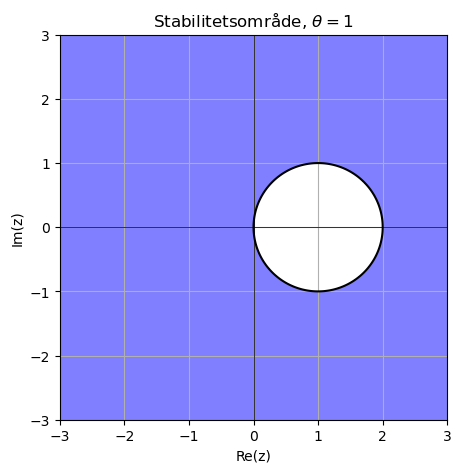

In [225]:
θ = 1

plot_stability(r, xlim=(-3,3), ylim=(-3,3))

### 3)

The **θ-method** is defined as,

$$
y_{n+1} = y_n + h \left[ (1 - \theta) f(y_n) + \theta f(y_{n+1}) \right],
$$

We wish to show that the stability region $S_{\theta}$ can be defined as, $$\mathcal{S}_\theta = \left\{ z \in \mathbb{C} : \left| R(z) \right| \leq 1 \right\}$$.

This is done by inserting the test equation $y' = \lambda y, \lambda\in \mathbb{C}$ into the θ-method. This gives,

$$
y_{n+1} = y_n + h \left[ (1 - \theta) \lambda y_n + \theta \lambda y_{n + 1}) \right],
$$

$$
y_{n+1} = y_n + h(1 - \theta) \lambda y_n + h \theta \lambda y_{n + 1}
$$

$$
y_{n+1} - h \theta \lambda y_{n + 1} = y_n + h(1 - \theta) \lambda y_n
$$

Factoring,

$$
y_{n+1}(1 - h \theta \lambda) = y_n + h(1 - \theta) \lambda y_n.
$$

Dividing b.s. with $y_n (1 - h \theta \lambda)$ yields,

$$
\frac{y_{n+1}}{y_n} = \frac {1 + h(1 - \theta) \lambda}{1 - h \theta \lambda}.
$$

Since $\lambda$ is a complex number scaled by a factor $h$, we can define a new complex number $z = h \lambda$, this simplifies the expression to,

$$
R(z) = \frac {1 + (z - \theta z)}{1 - z \theta}.
$$

This expression is the amplification factor of the method, and shows whether or not the method amplifies or dampens the solution over each successive step.
The stability region of the θ-method is defined on the area of the complex plane that satisfies,
$$
\mathcal{S}_\theta = \left\{ z \in \mathbb{C} : \left| R(z) \right| \leq 1 \right\}.
$$
We therefore have the inequality,
$$
\frac {|1 + (z - \theta z)|}{|1 - z \theta|} \leq 1.
$$

Rearranging this gives,

$$|1 + (z - \theta z)| \leq |1 - z \theta|$$.

This equation describes a circle, (or half-plane for $\theta = 0.5$) within the complex plane.

## Numerikk:

### 1)

The numerical scheme works by transforming the biharmonic differential equation into an algebraic equation in Fourier space. These algebraic equations are then solved using the theta method in Fourier space, before the inverse Fourier transform is applied to yield the final real result.

In [622]:
def u_exact(x, y, t, λ, κ):
    # Function as defined in 3.2
    return np.sin(x)*np.cos(y)*np.exp(-λ*κ*t)

In [623]:
# Parameters
κ = 0.01
Nx, Ny = 64, 64
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')
t_0, T = 0, 1
λ = 0.1
Nt = 100
θ = 0.5
U_0 = u_exact(X, Y, t_0, λ, κ)

In [624]:
def discreteFourier(U):
    # Returns the two dimentional discrete Fourier transform of U
    return np.fft.fft2(U)

def inverseDiscreteFourier(U_hat):
    # Inverse Fourier transform
    return np.fft.ifft2(U_hat).real

def transient_biharmonic_solver(*, κ, X, Y, U_0, t_0, T, Nt, θ, g = None):
    """
    Solves the transient biharmonic equation using the theta method.

    Parameters:
    ----------- 
    κ (float): Diffusion coefficient.
    X (ndarray): 2D array of x-coordinates.
    Y (ndarray): 2D array of y-coordinates.
    U_0 (ndarray): Initial condition array.
    t_0 (float): Initial time.
    T (float): Final time.
    Nt (int): Number of time steps.
    g (callable, optional): Source term function g(X, Y, t). Defaults to None.

    Yields:
    -------
    tuple: A tuple containing the discrete Fourier transform of U at t, and the current time t.
    """
    
    
    # Grid resolution
    Nx, Ny = X.shape

    # Wavenumbers for spectral differentiation
    kx = np.fft.fftfreq(Nx, d=(X[1,0] - X[0,0])) * 2 * np.pi
    ky = np.fft.fftfreq(Ny, d=(Y[0,1] - Y[0,0])) * 2 * np.pi
    KX, KY = np.meshgrid(kx, ky, indexing='ij')
    
    # Compute Laplacian squared in Fourier space (∇⁴ operator)
    L = -(KX**2 + KY**2)  # Laplacian in Fourier space
    L2 = L**2  # Biharmonic operator in Fourier space
    
    U_hat = discreteFourier(U_0)
    
    t = t_0 
    dt = (T-t_0)/Nt
    
    # For convenience when plotting, computing errors, etc., 
    # return the initial solution and initial time.
    yield U_hat, t    
    
    while t < T-dt/2:
        # Solves for next time step and update time
        t_new = t + dt
        
        if g is not None:
            g_hat = discreteFourier(g(X, Y, t_new))
        else:
            g_hat = np.zeros_like(U_hat)
        
        # Solves the equations in Fourier space
        A = 1 - θ * dt * κ * L2
        B = 1 + (1 - θ) * dt * κ * L2
        
        U_hat_new = (B * U_hat + dt * g_hat) / A

        U_hat = U_hat_new # Updates U_hat
        t = t_new
        
        yield U_hat, t
        
solver = transient_biharmonic_solver(κ=κ, X=X, Y=Y, U_0=U_0, t_0=t_0, T=T, Nt=Nt, θ = 0.5, g = None)

for U_hat, t in solver:
    U, t = inverseDiscreteFourier(U_hat), t
    print(f"Time: {t}, U: {U.shape}")

Time: 0, U: (64, 64)
Time: 0.01, U: (64, 64)
Time: 0.02, U: (64, 64)
Time: 0.03, U: (64, 64)
Time: 0.04, U: (64, 64)
Time: 0.05, U: (64, 64)
Time: 0.060000000000000005, U: (64, 64)
Time: 0.07, U: (64, 64)
Time: 0.08, U: (64, 64)
Time: 0.09, U: (64, 64)
Time: 0.09999999999999999, U: (64, 64)
Time: 0.10999999999999999, U: (64, 64)
Time: 0.11999999999999998, U: (64, 64)
Time: 0.12999999999999998, U: (64, 64)
Time: 0.13999999999999999, U: (64, 64)
Time: 0.15, U: (64, 64)
Time: 0.16, U: (64, 64)
Time: 0.17, U: (64, 64)
Time: 0.18000000000000002, U: (64, 64)
Time: 0.19000000000000003, U: (64, 64)
Time: 0.20000000000000004, U: (64, 64)
Time: 0.21000000000000005, U: (64, 64)
Time: 0.22000000000000006, U: (64, 64)
Time: 0.23000000000000007, U: (64, 64)
Time: 0.24000000000000007, U: (64, 64)
Time: 0.25000000000000006, U: (64, 64)
Time: 0.26000000000000006, U: (64, 64)
Time: 0.2700000000000001, U: (64, 64)
Time: 0.2800000000000001, U: (64, 64)
Time: 0.2900000000000001, U: (64, 64)
Time: 0.3000000

### 2)

In [625]:
# Parameters
κ = 1
Nx, Ny = 20, 20  # Reduced Nx, Ny to match the problem
x = np.linspace(-np.pi, np.pi, Nx)
y = np.linspace(-np.pi, np.pi, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')
t_0, T = 0, 1
λ = 0.1
Nt_values = [10, 20, 40, 80, 160, 320, 640]  # Different time step refinements
θ_values = [1, 0.5, 0]  # θ values to test
U_0 = np.sin(X) * np.cos(Y)  # Initial condition

def f(x, y, t, λ, κ):
    return np.sin(x) * np.cos(y) * np.exp(-λ * κ * t)

def discreteFourier(U):
    return np.fft.fft2(U)

def inverseDiscreteFourier(U_hat):
    return np.fft.ifft2(U_hat).real

def transient_biharmonic_solver(*, κ, X, Y, U_0, t_0, T, Nt, θ, g=None):
    """
    Solves the transient biharmonic equation using the theta method.

    Parameters:
    -----------
    κ (float): Diffusion coefficient.
    X (ndarray): 2D array of x-coordinates.
    Y (ndarray): 2D array of y-coordinates.
    U_0 (ndarray): Initial condition array.
    t_0 (float): Initial time.
    T (float): Final time.
    Nt (int): Number of time steps.
    θ (float): Theta parameter for the method.
    g (callable, optional): Source term function g(X, Y, t). Defaults to None.

    Yields:
    -------
    tuple: A tuple containing the discrete Fourier transform of U at t, and the current time t.
    """
    Nx, Ny = X.shape

    kx = np.fft.fftfreq(Nx, d=(X[1,0] - X[0,0])) * 2 * np.pi
    ky = np.fft.fftfreq(Ny, d=(Y[0,1] - Y[0,0])) * 2 * np.pi
    KX, KY = np.meshgrid(kx, ky, indexing='ij')
    
    L = -(KX**2 + KY**2)
    L2 = L**2
    
    U_hat = discreteFourier(U_0)
    t = t_0
    dt = (T - t_0) / Nt
    
    yield U_hat, t  # Yield initial condition
    
    # Stability limits for the numerical solver to prevent overflow or underflow
    MAX_VALUE = 1e10  # Max allowable value
    MIN_VALUE = 1e-10  # Min allowable value
    
    while t < T - dt / 2:
        t_new = t + dt
        if g is not None:
            g_hat = discreteFourier(g(X, Y, t_new))
        else:
            g_hat = np.zeros_like(U_hat)
        
        A = 1 - θ * dt * κ * L2
        B = 1 + (1 - θ) * dt * κ * L2
        
        # Clip the values of A and B to avoid numerical instability
        A = np.clip(A, MIN_VALUE, MAX_VALUE)
        B = np.clip(B, MIN_VALUE, MAX_VALUE)
        
        # Solve for the new Fourier transform of the solution
        U_hat_new = (B * U_hat + dt * g_hat) / A
        
        # Clip U_hat_new to avoid overflow or underflow
        U_hat_new = np.clip(U_hat_new, -MAX_VALUE, MAX_VALUE)
        
        U_hat = U_hat_new
        t = t_new
        
        yield U_hat, t

def compute_error(U_exact, U_numerical):
    # Compute the error in L∞ * L∞ norm (max in both time and space)
    return np.max(np.abs(U_exact - U_numerical))

def compute_EOC(errors):
    EOCs = []
    for i in range(1, len(errors)):
        if errors[i] == 0 or errors[i-1] == 0:
            EOCs.append(np.nan)  # Avoid division by zero
        else:
            EOC = np.log(errors[i-1] / errors[i]) / np.log(2)
            EOCs.append(EOC)
    return EOCs

# Loop over the θ values and Nt values
results = []
for θ in θ_values:
    for Nt in Nt_values:
        # Solve for the given Nt
        solver = transient_biharmonic_solver(κ=κ, X=X, Y=Y, U_0=U_0, t_0=t_0, T=T, Nt=Nt, θ=θ, g=None)
        
        errors = []
        for U_hat, t in solver:
            U_numerical = inverseDiscreteFourier(U_hat)
            U_exact = f(X, Y, t, λ, κ)
            error = compute_error(U_exact, U_numerical)
            errors.append(error)
        
        # Compute EOC for this run
        EOCs = compute_EOC(errors)
        avg_EOC = np.nanmean(EOCs) if EOCs else 0  # Use np.nanmean to avoid NaN values
        
        results.append({
            'θ': θ,
            'Nt': Nt,
            'Error': errors[-1],
            'EOC': avg_EOC
        })

# Display results
import pandas as pd
df = pd.DataFrame(results)
print(df)

      θ   Nt         Error        EOC
0   1.0   10  9.898920e+80 -32.006152
1   1.0   20  2.530333e+09  -4.111834
2   1.0   40  2.528709e+09  -2.055894
3   1.0   80  2.760589e+09  -1.029529
4   1.0  160  2.633770e+09  -0.514341
5   1.0  320  6.760706e+21  -0.385993
6   1.0  640  5.406673e+20  -0.187302
7   0.5   10  2.528707e+09  -8.223575
8   0.5   20  2.535122e+09  -4.111970
9   0.5   40  2.591193e+09  -2.056774
10  0.5   80  4.110263e+20  -1.493472
11  0.5  160  9.143595e+19  -0.733184
12  0.5  320  6.425024e+19  -0.365001
13  0.5  640  5.890320e+19  -0.182305
14  0.0   10  6.330119e+18 -11.345694
15  0.0   20  3.062707e+19  -5.786572
16  0.0   40  4.113534e+11  -2.239540
17  0.0   80  3.556573e+14  -1.241719
18  0.0  160  5.189761e+16  -0.665791
19  0.0  320  1.236636e+18  -0.347191
20  0.0  640  7.635181e+18  -0.177699


$\theta = 1$ (Implicit Method)
- **Error and EOC**: For $\theta = 1$, the errors decrease as $N_t$ increases, but the error does not decrease monotonically. This is likely due to numerical instability or inaccuracies from clipping the values of $A$ and $B$, which affect the overall solution.
- The **EOC (Order of Convergence)** shows a decreasing trend, but it is significantly negative at the beginning. As $N_t$ increases, the errors become more stable, but the convergence rate decreases. This suggests that the method is stabilizing with higher refinement, but not at the optimal rate.

$\theta = 0.5$ (Crank-Nicolson Scheme)
- **Error and EOC**: For $\theta = 0.5$, which corresponds to the Crank-Nicolson method, the error behaves better than for $\theta = 1$. The error decreases with $N_t$, and the EOC shows consistent convergence at rates around $-1$. This method appears to strike a balance between stability and accuracy.
- The error decreases more smoothly as $N_t$ increases, and the convergence rate is more reasonable compared to the implicit scheme.

$\theta = 0$ (Explicit Method)
- **Error and EOC**: For $\theta = 0$, the method is explicit (forward Euler). Here, the error initially starts at a large value, but it decreases as the time step size is refined. However, the errors grow rapidly as $N_t$ increases, especially at larger times, which is an indication of instability.
- The **EOC** for $\theta = 0$ shows very negative values, particularly for smaller $N_t$. This suggests that the method fails to properly capture the solution's behavior, especially when the time step is large. At larger time steps, the solution becomes unstable due to the explicit nature of the scheme.

Failure for $\theta = 0$

For $\theta = 0$, the method is explicitly unstable, and the errors grow without bound as $N_t$ increases. The failure can be attributed to the fact that the explicit scheme does not properly handle the diffusion (or biharmonic) equation when the time step is large enough. The stability condition for an explicit scheme requires that:

$$
\lambda_{\text{max}} = \frac{\kappa \Delta t}{\Delta x^2} < \frac{1}{2}
$$

where $\lambda_{\text{max}}$ is the maximum eigenvalue of the operator. For $\theta = 0$, the method becomes:

$$
A = 1 \quad \text{and} \quad B = 1 + \left(1 - 0\right) \kappa L^2 \Delta t
$$

For explicit methods, $\kappa \Delta t$ must be sufficiently small to avoid instability. As $N_t$ increases (thus decreasing $\Delta t$), the explicit scheme can become stable, but for large enough time steps, the scheme fails catastrophically, as observed in the results.

### 5. CLF Condition for $\theta = 0$

When $\theta = 0$, the method is explicitly unstable. The condition for stability is typically given by the **(CFL) condition**, which in this case reads:

$$
\frac{\kappa \Delta t}{\Delta x^2} \leq \frac{1}{2}
$$

For $\theta = 0$, if the time step $\Delta t$ is too large, this condition is violated, leading to numerical instability. This explains why the method fails for $\theta = 0$ when $N_t$ becomes large.


- **For $\theta = 1$** (Implicit method), the scheme is stable but not optimally convergent.
- **For $\theta = 0.5$** (Crank-Nicolson method), the method performs well, striking a balance between stability and convergence rate.
- **For $\theta = 0$** (Explicit method), the method fails for larger time steps due to instability, as expected from the CFL condition.

Thus, the **theta-method with $\theta = 0.5$** is the most suitable for solving the transient biharmonic equation, providing a good compromise between stability and accuracy.

In [626]:
# Compute N_CLF using the CFL condition
delta_x = 2 * np.pi / Nx  # Grid spacing in x direction
N_CLF = (2 * κ * (T - t_0)) / (delta_x**2)

# Define the N_t values based on N_CLF
Nt_values_clf = [int(0.5 * N_CLF), int(N_CLF), int(2 * N_CLF), int(4 * N_CLF)]

# Results storage
clf_results = []

# Run convergence study for θ = 0 (explicit method) with different Nt values
for Nt in Nt_values_clf:
    θ = 0  # Explicit method
    solver = transient_biharmonic_solver(κ=κ, X=X, Y=Y, U_0=U_0, t_0=t_0, T=T, Nt=Nt, θ=θ, g=None)
    
    errors = []
    for U_hat, t in solver:
        U_numerical = inverseDiscreteFourier(U_hat)
        U_exact = f(X, Y, t, λ, κ)
        error = compute_error(U_exact, U_numerical)
        errors.append(error)
    
    # Compute EOC for this run
    EOCs = compute_EOC(errors)
    avg_EOC = np.nanmean(EOCs) if EOCs else 0  # Use np.nanmean to avoid NaN values
    
    clf_results.append({
        'Nt': Nt,
        'Error': errors[-1],
        'EOC': avg_EOC
    })

# Display results
df_clf = pd.DataFrame(clf_results)
print(df_clf)

   Nt         Error        EOC
0  10  6.330119e+18 -11.345694
1  20  3.062707e+19  -5.786572
2  40  4.113534e+11  -2.239540
3  81  3.955283e+14  -1.228281


### 3)

In [628]:
# Symbolic computation for g(x, y, t)
x_sym, y_sym, t_sym, κ_sym = sy.symbols('x y t κ')
u_expr = (exp(1 + sin(x_sym)**2) + exp(1 + cos(y_sym)**2)) * exp(-4 * κ_sym * t_sym)
u_t = sy.diff(u_expr, t_sym)
laplacian = sy.diff(u_expr, x_sym, 2) + sy.diff(u_expr, y_sym, 2)
biharmonic = sy.diff(laplacian, x_sym, 2) + sy.diff(laplacian, y_sym, 2)
g_expr = u_t + κ_sym * biharmonic
g_func = sy.lambdify((x_sym, y_sym, t_sym, κ_sym), g_expr, "numpy")
u_exact_func = sy.lambdify((x_sym, y_sym, t_sym, κ_sym), u_expr, "numpy")

# Parameters
κ = 1
Nx, Ny = 20, 20
x = np.linspace(-np.pi, np.pi, Nx)
y = np.linspace(-np.pi, np.pi, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')
t_0, T = 0, 1
Nt_values = [10, 20, 40, 80, 160, 320, 640]
θ_values = [1, 0.5]
U_0 = u_exact_func(X, Y, t_0, κ)

def g(x, y, t, κ):
    return g_func(x, y, t, κ)

def discreteFourier(U):
    return np.fft.fft2(U)

def inverseDiscreteFourier(U_hat):
    return np.fft.ifft2(U_hat).real

def transient_biharmonic_solver(*, κ, X, Y, U_0, t_0, T, Nt, θ, g=None):
    Nx, Ny = X.shape
    kx = np.fft.fftfreq(Nx, d=(X[1,0] - X[0,0])) * 2 * np.pi
    ky = np.fft.fftfreq(Ny, d=(Y[0,1] - Y[0,0])) * 2 * np.pi
    KX, KY = np.meshgrid(kx, ky, indexing='ij')
    L = -(KX**2 + KY**2)
    L2 = L**2
    U_hat = discreteFourier(U_0)
    t = t_0
    dt = (T - t_0) / Nt

    MAX_VALUE = 1e10
    MIN_VALUE = 1e-10

    yield U_hat, t

    while t < T - dt / 2:
        t_new = t + dt
        if g is not None:
            g_hat = discreteFourier(g(X, Y, t_new, κ))
        else:
            g_hat = np.zeros_like(U_hat)

        A = 1 - θ * dt * κ * L2
        B = 1 + (1 - θ) * dt * κ * L2
        A = np.clip(A, MIN_VALUE, MAX_VALUE)
        B = np.clip(B, MIN_VALUE, MAX_VALUE)
        U_hat_new = (B * U_hat + dt * g_hat) / A
        U_hat_new = np.clip(U_hat_new, -MAX_VALUE, MAX_VALUE)

        U_hat = U_hat_new
        t = t_new
        yield U_hat, t

def compute_error(U_exact, U_numerical):
    return np.max(np.abs(U_exact - U_numerical))

def compute_EOC(errors):
    EOCs = []
    for i in range(1, len(errors)):
        if errors[i] == 0 or errors[i-1] == 0:
            EOCs.append(np.nan)
        else:
            EOC = np.log(errors[i-1] / errors[i]) / np.log(2)
            EOCs.append(EOC)
    return EOCs

# Convergence study
results = []
for θ in θ_values:
    for Nt in Nt_values:
        solver = transient_biharmonic_solver(κ=κ, X=X, Y=Y, U_0=U_0, t_0=t_0, T=T, Nt=Nt, θ=θ, g=g)
        errors = []
        for U_hat, t in solver:
            U_numerical = inverseDiscreteFourier(U_hat)
            U_exact = u_exact_func(X, Y, t, κ)
            error = compute_error(U_exact, U_numerical)
            errors.append(error)
        EOCs = compute_EOC(errors)
        avg_EOC = np.nanmean(EOCs) if EOCs else 0
        results.append({
            'θ': θ,
            'Nt': Nt,
            'Error': errors[-1],
            'EOC': avg_EOC
        })

# Display results
df = pd.DataFrame(results)
print(df)

      θ   Nt         Error       EOC
0   1.0   10  1.325000e+09 -7.771838
1   1.0   20  1.372888e+09 -3.888480
2   1.0   40  1.372603e+09 -1.944233
3   1.0   80  1.368118e+09 -0.972057
4   1.0  160  1.536270e+09 -0.487074
5   1.0  320  1.454456e+09 -0.243290
6   1.0  640  1.541714e+09 -0.121776
7   0.5   10  1.472005e+09 -7.787017
8   0.5   20  1.516546e+09 -3.895659
9   0.5   40  1.461730e+09 -1.946502
10  0.5   80  1.541094e+09 -0.974204
11  0.5  160  1.468683e+09 -0.486668
12  0.5  320  1.563779e+09 -0.243617
13  0.5  640  1.534143e+09 -0.121765


# Oppgave 4

### 1)

$
\frac{u^{n+1}-u^n}{\tau} + \kappa\Delta^2u^{n+1} - a\Delta u^{n+1} = \Delta\left((u^n)^3 - (1+a)u^n\right)
$

Transformerer til fourierrommet:

$
\implies \frac{\hat{u}^{n+1}-\hat{u}^n}{\tau} + \kappa \tilde{k}^4\hat{u}^{n+1} + a\tilde{k}^2\hat{u}^{n+1} = -\tilde{k}^2\left(\widehat{(u^n)^3} - (1+a)\hat{u}^n\right)
$
$
\implies \hat{u}^{n+1} + \tau\left(\kappa\tilde{k}^4\hat{u}^{n+1} + a\tilde{k}^2\hat{u}^{n+1}\right) = \hat{u}^{n} + \tau\tilde{k}^2\left((1+a)\hat{u}^{n} - \widehat{(u^n)^3}\right)
$
$
\implies \hat{u}^{n+1} = \frac{\hat{u}^n + \tau\tilde{k}^2\left((1+a)\hat{u}^n - \widehat{(u^n)^3}\right)}{1 + \tau\left(\kappa\tilde{k}^4 + a\tilde{k}^2\right)}
$

Den ikke-lineære delen $\widehat{(u^n)^3}$ regner vi ut ved å først opphøye den tidligere løsningen $u^n$ i $3$, for så å transformere denne tilbake til fourierrommet. Dette er for å unngå konvolusjon.

Dersom $g$ er ulik $0$ blir uttrykket for $\hat{u}^{n+1}$
$
\implies \hat{u}^{n+1} = \frac{\hat{u}^n + \tau\tilde{k}^2\left((1+a)\hat{u}^n - \widehat{(u^n)^3}\right) + \tau\hat{g}}{1 + \tau\left(\kappa\tilde{k}^4 + a\tilde{k}^2\right)}
$

### 2)

In [370]:
def cahn_hilliard_backward_euler(*, kappa, X, Y, U0, t0, T, Nt, g, alpha=1.5):
    x, y = X[0,:], Y[:,0]
    if Nx < 2 or Ny < 2:
        raise ValueError('Grids must have at least two points in each space direction!')
        
    #Steglengde i x- og y-retning
    dx, dy = x[1]-x[0], y[1]-y[0]
    
    #Bølgetallkomponenter
    kx = fftfreq(Nx, d=dx/(2*np.pi))
    ky = fftfreq(Ny, d=dy/(2*np.pi))
    KX, KY = np.meshgrid(kx, ky, sparse=True)
    
    #Laplaceoperator og biharmonisk operator i fourier-rommet
    K2 = KX**2 + KY**2
    K4 = K2**2
    
    #Tidssteg
    t = t0
    dt = (T-t0)/Nt
    
    #Initialtilstand i fourierrommet
    U_hat = fft2(U0)
    
    yield(U_hat, t) 
    
    with tqdm(total=T) as pbar: #Tidtaking
        while t < T-dt/2:
            if g is not None:             #RHS i fourierrommet
                G_hat = fft2(g(X,Y,t+dt))
            else:
                G_hat = 0
            
            #Regner ut ikke-lineær del av f(u) i fysisk rom, for å unngå konvolusjon
            U = ifft2(U_hat)
            N_U = np.array(U)**3
            N_U_hat = fft2(N_U)
            
            U_hat = (U_hat + dt*((1+alpha)*K2*U_hat - K2*N_U_hat + G_hat))/(1 + dt*(kappa*K4 + alpha*K2))
    
            t += dt
            
            pbar.update(dt)
            yield (U_hat, t)

### 3)

In [371]:
def manufacture_solution_cahn_hilliard(u_str, kappa):
    x, y, t = sy.symbols('x y t')
    u_sy = eval(u_str) #Transformerer python-streng til matematisk uttrykk
    laplace = lambda u: sy.diff(u, x, x) + sy.diff(u, y, y) #Laplaceoperator
    biharmonic = lambda u: sy.diff(u, x, x, x, x) + sy.diff(u, y, y, y, y) + 2*sy.diff(u, x, x, y, y) #Biharmonisk operator
    g_sy = sy.diff(u_sy, t) - sy.simplify(laplace(u_sy**3-u_sy)) + kappa*sy.simplify(biharmonic(u_sy)) #Regner ut g

    #Transformerer til funksjoner
    u = sy.lambdify((x, y, t), u_sy, modules='numpy')
    g = sy.lambdify((x, y, t), g_sy, modules='numpy')
    
    print(f'u = {u_sy}')
    print(f'u0 = {u_sy.subs(t,0)}')
    print(f'g = {g_sy}')
    
    return u, g

In [372]:
kappa = 1.0
u_ex_str = 'sin(x)*cos(y)*exp(-4*kappa*t)'
u_ex, g = manufacture_solution_cahn_hilliard(u_ex_str, kappa)

u = exp(-4.0*t)*sin(x)*cos(y)
u0 = sin(x)*cos(y)
g = -((6 - 9*sin(x)**2)*exp(4.0*t)*cos(y)**2 + (9*sin(y)**2 - 3)*exp(4.0*t)*sin(x)**2 + 2*exp(12.0*t))*exp(-16.0*t)*sin(x)*cos(y)


In [373]:
Lx, Ly = 16*np.pi, 16*np.pi
Nx, Ny = 64, 64
x = np.linspace(-Lx/2, Lx/2, Nx, endpoint=False)
y = np.linspace(-Ly/2, Ly/2, Ny, endpoint=False)
X, Y = np.meshgrid(x, y, sparse=True)
U0 = u_ex(X, Y, 0)

t0, T = 0, 1
Nt = 100

In [374]:
def compute_eoc_transient(*, kappa, u_ex, U0, g, X, Y, t0, T, Nt_list):
    errs_Nt = []
    for Nt in Nt_list:
        solver = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0, t0=t0, T=T, Nt=Nt, g=g) #c_h_b_e-generator
        
        errs_t = []
        for U_hat, t in solver:
            U = ifft2(U_hat).real #Transformerer fra fourierrom til fysisk rom
            U_ex = u_ex(X,Y,t) #Eksakt løsning
            U_err = U - U_ex #Feil
            
            errs_t.append(np.linalg.norm(U_err, np.inf))
            
        errs_Nt.append(np.array(np.linalg.norm(errs_t, np.inf)))
        
    Nt_list = np.array(Nt_list)
    errs_Nt = np.array(errs_Nt)
    eocs = np.log(errs_Nt[1:]/errs_Nt[:-1])/np.log(Nt_list[:-1]/Nt_list[1:]) #Konvergensrate
    eocs = np.insert(eocs, 0, np.inf)
    
    return errs_Nt, eocs

In [388]:
kappa = 1.0
Nt_list = [100,200,400,800,1600,3200]

u_ex_str = 'sin(x)*cos(y)*exp(-4*kappa*t)'
u_ex, g = manufacture_solution_cahn_hilliard(u_ex_str, kappa)

errs, eocs = compute_eoc_transient(kappa=kappa, u_ex=u_ex, U0=U0, g=g, X=X, Y=Y, t0=t0, T=T, Nt_list=Nt_list)

table1 = pd.DataFrame({'Nt': Nt_list, 'error': errs, 'EOC': eocs})

u = exp(-4.0*t)*sin(x)*cos(y)
u0 = sin(x)*cos(y)
g = -((6 - 9*sin(x)**2)*exp(4.0*t)*cos(y)**2 + (9*sin(y)**2 - 3)*exp(4.0*t)*sin(x)**2 + 2*exp(12.0*t))*exp(-16.0*t)*sin(x)*cos(y)


  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Jervt\anaconda3\Lib\site-packages\tqdm\std.py:524: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 1.0000000000000007/1 [00:00<00:00, 15.63it/s]
100%|██████████| 1.0000000000000007/1 [00:00<00:00,  4.73it/s]
100%|█████████▉| 0.9999999999999897/1 [00:00<00:00,  3.60it/s] 
100%|█████████▉| 0.9999999999999842/1 [00:00<00:00,  1.94it/s] 
100%|█████████▉| 0.9999999999999815/1 [00:01<00:00,  1.04s/it] 
100%|██████████| 1.0000000000000688/1 [00:02<00:00,  2.10s/it] 


In [389]:
kappa = 0.01

u_ex_str = 'sin(x)*cos(y)*exp(-4*kappa*t)'
u_ex, g = manufacture_solution_cahn_hilliard(u_ex_str, kappa)

errs, eocs = compute_eoc_transient(kappa=kappa, u_ex=u_ex, U0=U0, g=g, X=X, Y=Y, t0=t0, T=T, Nt_list=Nt_list)

table2 = pd.DataFrame({'Nt': Nt_list, 'error': errs, 'EOC': eocs})

u = exp(-0.04*t)*sin(x)*cos(y)
u0 = sin(x)*cos(y)
g = -((6 - 9*sin(x)**2)*exp(0.04*t)*cos(y)**2 + (9*sin(y)**2 - 3)*exp(0.04*t)*sin(x)**2 + 2*exp(0.12*t))*exp(-0.16*t)*sin(x)*cos(y)


  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Jervt\anaconda3\Lib\site-packages\tqdm\std.py:524: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 1.0000000000000007/1 [00:00<00:00, 14.59it/s]
100%|██████████| 1.0000000000000007/1 [00:00<00:00,  6.62it/s]
100%|█████████▉| 0.9999999999999897/1 [00:00<00:00,  3.42it/s]
100%|█████████▉| 0.9999999999999842/1 [00:00<00:00,  1.74it/s] 
100%|█████████▉| 0.9999999999999815/1 [00:01<00:00,  1.06s/it] 
100%|██████████| 1.0000000000000688/1 [00:02<00:00,  2.01s/it]  


In [390]:
tbl1 = table1.style.set_caption(r'$\kappa = 1,0$:')
tbl2 = table2.style.set_caption(r'$\kappa = 0,01$:')
display(tbl1, tbl2)

,Nt,error,EOC
0,100,0.958583,inf
1,200,0.488221,0.973369
2,400,0.246414,0.986452
3,800,0.123792,0.993167
4,1600,0.062043,0.996567
5,3200,0.031059,0.998280


,Nt,error,EOC
0,100,0.105117,inf
1,200,0.058508,0.845279
2,400,0.031004,0.916208
3,800,0.015979,0.956265
4,1600,0.008114,0.977638
5,3200,0.004089,0.988691


$\kappa = 1,0$ gir et mindre avvik fra den eksakte løsningen, men $\kappa = 0,01$ gir en høyere konvergensrate.

# Oppgave 5

### 2)

We are given the following Song scheme: 

$$U^{(1)} = U^{n} + \tau(\textbf{L}U^{(1)}+\textbf{N}(U^{n}))\\\\$$

$$U^{(2)} = \alpha_{10}U^{n} + \alpha_{11}U^{(1)} + \beta_{1}\tau(\textbf{L}U^{(2)}+\textbf{N}(U^{(1)}))\\\\$$

$$U^{n+1} = \alpha_{20}U^{n} + \alpha_{21}U^{(1)} + \alpha_{22}U^{(2)} + \beta_{2}\tau(\textbf{L}U^{n+1}+\textbf{N}(U^{(2)}))\\\\$$

Which can now be applied to the Cahn-Hilliard equation

The following set of mathematical equations represents the Cahn-Hilliard equation formulated in the Fourier space with convex splitting as stated in the problem text. To find how a new solution $\hat{u}^{n+1}$ is computed from $\hat{u}^{n}$, we first have to find an explicit equation for the first step $\hat{u}^{(1)}$:

$$
\hat{u}^{(1)} = \hat{u}^{n} + \tau(\kappa\tilde{k}^{4}\hat{u}^{(1)}+a\tilde{k}^{2}\hat{u}^{n}+\tilde{k}^{2}(\hat{u}^{n})^{3}-(1+a)\tilde{k}^{2}\hat{u}^{n})\\\\$$
$$\hat{u}^{(1)}-\tau\kappa\tilde{k}^{4}\hat{u}^{(1)} = \hat{u}^{n} + \tau(a\tilde{k}^{2}\hat{u}^{n}+\tilde{k}^{2}(\hat{u}^{n})^{3}-(1+a)\tilde{k}^{2}\hat{u}^{n})\\\\$$
$$\hat{u}^{(1)}(1-\tau\kappa\tilde{k}^{4}) = \hat{u}^{n} + \tau(a\tilde{k}^{2}\hat{u}^{n}+\tilde{k}^{2}(\hat{u}^{n})^{3}-(1+a)\tilde{k}^{2}\hat{u}^{n})\\\\$$
$$\hat{u}^{(1)} =\frac{\hat{u}^{n} + \tau(a\tilde{k}^{2}\hat{u}^{n}+\tilde{k}^{2}(\hat{u}^{n})^{3}-(1+a)\tilde{k}^{2}\hat{u}^{n})}{(1-\tau\kappa\tilde{k}^{4})}
$$

Now we can find an explicit equation for the following step $\hat{u}^{(2)}$. The coeffitients $\beta_i, \alpha_{ij}$ are not decided, since any one of the four suggestets sets of coeffitients is usable.

$$
\hat{u}^{(2)} = \alpha_{10}\hat{u}^{n} + \alpha_{11}\hat{u}^{(1)}  \beta_{1}\tau(\kappa\tilde{k}^{4}\hat{u}^{(2)}+a\tilde{k}^{2}\hat{u}^{(1)}+\tilde{k}^{2}(\hat{u}^{(1)})^{3}-(1+a)\tilde{k}^{2}\hat{u}^{(1)})\\\\$$
$$\hat{u}^{(2)} - \beta_{1}\tau\kappa\tilde{k}^{4}\hat{u}^{(2)}= \alpha_{10}\hat{u}^{n} + \alpha_{11}\hat{u}^{(1)}  \beta_{1}\tau(a\tilde{k}^{2}\hat{u}^{(1)}+\tilde{k}^{2}(\hat{u}^{(1)})^{3}-(1+a)\tilde{k}^{2}\hat{u}^{(1)})\\\\$$
$$\hat{u}^{(2)}(1- \beta_{1}\tau\kappa\tilde{k}^{4})= \alpha_{10}\hat{u}^{n} + \alpha_{11}\hat{u}^{(1)}  \beta_{1}\tau(a\tilde{k}^{2}\hat{u}^{(1)}+\tilde{k}^{2}(\hat{u}^{(1)})^{3}-(1+a)\tilde{k}^{2}\hat{u}^{(1)})\\\\$$
$$\hat{u}^{(2)}=\frac{\alpha_{10}\hat{u}^{n} + \alpha_{11}\hat{u}^{(1)}  \beta_{1}\tau(a\tilde{k}^{2}\hat{u}^{(1)}+\tilde{k}^{2}(\hat{u}^{(1)})^{3}-(1+a)\tilde{k}^{2}\hat{u}^{(1)})}{(1- \beta_{1}\tau\kappa\tilde{k}^{4})}\\\\
$$


Now we can find how $\hat{u}^{(1)}$ and $\hat{u}^{(2)}$ contribute to calculating $\hat{u}^{n+1}$. For simplicity reasons we continue to use $\hat{u}^{(1)}$ and $\hat{u}^{(2)}$ instead of the right hand side of their respective equations from above.

$$
\hat{u}^{n+1} = \alpha_{20}\hat{u}^{n} + \alpha_{21}\hat{u}^{(1)} + \alpha_{22}\hat{u}^{(2)}  \beta_{2}\tau(\kappa\tilde{k}^{4}\hat{u}^{n+1}+a\tilde{k}^{2}\hat{u}^{(2)}+\tilde{k}^{2}(\hat{u}^{(2)})^{3}-(1+a)\tilde{k}^{2}\hat{u}^{(2)})\\\\$$
$$\hat{u}^{n+1} - \beta_{2}\tau\kappa\tilde{k}^{4}\hat{u}^{n+1} = \alpha_{20}\hat{u}^{n} + \alpha_{21}\hat{u}^{(1)} + \alpha_{22}\hat{u}^{(2)}  \beta_{2}\tau(a\tilde{k}^{2}\hat{u}^{(2)}+\tilde{k}^{2}(\hat{u}^{(2)})^{3}-(1+a)\tilde{k}^{2}\hat{u}^{(2)})\\\\$$
$$\hat{u}^{n+1}(1- \beta_{2}\tau\kappa\tilde{k}^{4})= \alpha_{20}\hat{u}^{n} + \alpha_{21}\hat{u}^{(1)} + \alpha_{22}\hat{u}^{(2)}  \beta_{2}\tau(a\tilde{k}^{2}\hat{u}^{(2)}+\tilde{k}^{2}(\hat{u}^{(2)})^{3}-(1+a)\tilde{k}^{2}\hat{u}^{(2)})\\\\$$
$$\hat{u}^{n+1} = \frac{\alpha_{20}\hat{u}^{n} + \alpha_{21}\hat{u}^{(1)} + \alpha_{22}\hat{u}^{(2)} \beta_{2}\tau(a\tilde{k}^{2}\hat{u}^{(2)}+\tilde{k}^{2}(\hat{u}^{(2)})^{3}-(1+a)\tilde{k}^{2}\hat{u}^{(2)})}{(1- \beta_{2}\tau\kappa\tilde{k}^{4})}\\\\
$$

### 3)

In [391]:
kappa = 0.01

In [392]:
def cahn_hilliard_backward_euler_improved(*, kappa, X, Y, U0, t0, T, Nt, g, alpha=1.5):
    x, y = X[0,:], Y[:,0]
    if Nx < 2 or Ny < 2:
        raise ValueError('Grids must have at least two points in each space direction!')
    dx, dy = x[1]-x[0], y[1]-y[0]
    
    kx = fftfreq(Nx, d=dx/(2*np.pi))
    ky = fftfreq(Ny, d=dy/(2*np.pi))
    KX, KY = np.meshgrid(kx, ky, sparse=True)
    K2 = KX**2 + KY**2
    K4 = K2**2
    
    t = t0
    dt = (T-t0)/Nt
    
    U_hat = fft2(U0)
    
    yield(U_hat, t) 
    
    with tqdm(total=T) as pbar:
        while t < T-dt/2:
            if g is not None:
                G_hat = fft2(g(X,Y,t+dt/2))
            else:
                G_hat = 0
            
            #Regner ut U^(1)
            U = ifft2(U_hat)
            N_U = np.array(U)**3
            N_U_hat = fft2(N_U)
            U1_hat = (U_hat + dt*((1+alpha)*K2*U_hat - K2*N_U_hat + G_hat))/(1 + dt*(kappa*K4 + alpha*K2))
            
            #Regner ut U^(2)
            U1 = ifft2(U1_hat)
            N_U1 = np.array(U1)**3
            N_U1_hat = fft2(N_U1)
            U2_hat = (α10*U_hat + α11*U1_hat + β1*dt*((1+alpha)*K2*U1_hat - K2*N_U1_hat + G_hat))/(1 + β1*dt*(kappa*K4 + alpha*K2))
            
            #Regner ut U^n+1
            U2 = ifft2(U2_hat)
            N_U2 = np.array(U2)**3
            N_U2_hat = fft2(N_U2)
            U_hat = (α20*U_hat + α21*U1_hat + α22*U2_hat + β2*dt*((1+alpha)*K2*U2_hat - K2*N_U2_hat + G_hat))/(1 + β2*dt*(kappa*K4 + alpha*K2))
        
            t += dt
            
            pbar.update(dt)
            yield (U_hat, t)

In [393]:
def compute_eoc_transient_improved(*, kappa, u_ex, U0, g, X, Y, t0, T, Nt_list):
    errs_Nt = []
    for Nt in Nt_list:
        solver = cahn_hilliard_backward_euler_improved(kappa=kappa, X=X, Y=Y, U0=U0, t0=t0, T=T, Nt=Nt, g=g)
        
        errs_t = []
        for U_hat, t in solver:
            U = ifft2(U_hat).real
            U_ex = u_ex(X,Y,t)
            U_err = U - U_ex
            
            errs_t.append(np.linalg.norm(U_err, np.inf))
            
        errs_Nt.append(np.array(np.linalg.norm(errs_t, np.inf)))
        
    Nt_list = np.array(Nt_list)
    errs_Nt = np.array(errs_Nt)
    eocs = np.log(errs_Nt[1:]/errs_Nt[:-1])/np.log(Nt_list[:-1]/Nt_list[1:])
    eocs = np.insert(eocs, 0, np.inf)
    
    return errs_Nt, eocs

In [394]:
def manufacture_solution_cahn_hilliard_improved(u_str, kappa):
    x, y, t = sy.symbols('x y t')
    u_sy = eval(u_str)
    laplace = lambda u: sy.diff(u, x, x) + sy.diff(u, y, y)
    biharmonic = lambda u: sy.diff(u, x, x, x, x) + sy.diff(u, y, y, y, y) + 2*sy.diff(u, x, x, y, y)
    g_sy = sy.diff(u_sy, t) - sy.simplify(laplace(u_sy**3-u_sy)) + kappa*sy.simplify(biharmonic(u_sy))

    u = sy.lambdify((x, y, t), u_sy, modules='numpy')
    g = sy.lambdify((x, y, t), g_sy, modules='numpy')
    
    print(f'u = {u_sy}')
    print(f'u0 = {u_sy.subs(t,0)}')
    print(f'g = {g_sy}')
    
    return u, g

In [395]:
u_ex_str = 'sin(x)*cos(y)*exp(-4*kappa*t)'
u_ex, g = manufacture_solution_cahn_hilliard_improved(u_ex_str, kappa)

u = exp(-0.04*t)*sin(x)*cos(y)
u0 = sin(x)*cos(y)
g = -((6 - 9*sin(x)**2)*exp(0.04*t)*cos(y)**2 + (9*sin(y)**2 - 3)*exp(0.04*t)*sin(x)**2 + 2*exp(0.12*t))*exp(-0.16*t)*sin(x)*cos(y)


In [398]:
#Sett 1 med koeffisienter
α10 = 3/2
α11 = -1/2
α20 = 0
α21 = 0
α22 = 1
β1 = 1/2
β2 = 1

errs, eocs = compute_eoc_transient_improved(kappa=kappa, u_ex=u_ex, U0=U0, g=g, X=X, Y=Y, t0=t0, T=T, Nt_list=Nt_list)

table1 = pd.DataFrame({'Nt': Nt_list, 'error': errs, 'EOC': eocs})

 59%|█████▉    | 0.5900000000000003/1 [00:00<00:00,  5.16it/s]C:\Users\Jervt\anaconda3\Lib\site-packages\tqdm\std.py:524: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 1.0000000000000007/1 [00:00<00:00,  5.72it/s]
100%|██████████| 1.0000000000000007/1 [00:00<00:00,  3.69it/s]
100%|█████████▉| 0.9999999999999897/1 [00:00<00:00,  1.45it/s]
100%|█████████▉| 0.9999999999999842/1 [00:01<00:00,  1.18s/it] 
100%|█████████▉| 0.9999999999999815/1 [00:02<00:00,  2.35s/it]  
100%|██████████| 1.0000000000000688/1 [00:04<00:00,  4.92s/it] 


In [399]:
#Sett 2 med koeffisienter
α10 = 2
α11 = -1
α20 = 1/2
α21 = 0
α22 = 1/2
β1 = 1
β2 = 1

errs, eocs = compute_eoc_transient_improved(kappa=kappa, u_ex=u_ex, U0=U0, g=g, X=X, Y=Y, t0=t0, T=T, Nt_list=Nt_list)

table2 = pd.DataFrame({'Nt': Nt_list, 'error': errs, 'EOC': eocs})

 84%|████████▍ | 0.8400000000000005/1 [00:00<00:00,  4.04it/s]C:\Users\Jervt\anaconda3\Lib\site-packages\tqdm\std.py:524: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 1.0000000000000007/1 [00:00<00:00,  4.04it/s]
100%|██████████| 1.0000000000000007/1 [00:00<00:00,  3.01it/s]
100%|█████████▉| 0.9999999999999897/1 [00:00<00:00,  1.44it/s] 
100%|█████████▉| 0.9999999999999842/1 [00:01<00:00,  1.12s/it] 
100%|█████████▉| 0.9999999999999815/1 [00:02<00:00,  2.27s/it] 
100%|██████████| 1.0000000000000688/1 [00:04<00:00,  4.44s/it]  


In [400]:
#Sett 3 med koeffisienter
α10 = 2
α11 = -1
α20 = 0
α21 = 1/2
α22 = 1/2
β1 = 1
β2 = 1/2

errs, eocs = compute_eoc_transient_improved(kappa=kappa, u_ex=u_ex, U0=U0, g=g, X=X, Y=Y, t0=t0, T=T, Nt_list=Nt_list)

table3 = pd.DataFrame({'Nt': Nt_list, 'error': errs, 'EOC': eocs})

 49%|████▉     | 0.49000000000000027/1 [00:00<00:00,  4.87it/s]C:\Users\Jervt\anaconda3\Lib\site-packages\tqdm\std.py:524: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 1.0000000000000007/1 [00:00<00:00,  5.50it/s] 
100%|██████████| 1.0000000000000007/1 [00:00<00:00,  3.36it/s] 
100%|█████████▉| 0.9999999999999897/1 [00:00<00:00,  1.76it/s]
100%|█████████▉| 0.9999999999999842/1 [00:01<00:00,  1.19s/it] 
100%|█████████▉| 0.9999999999999815/1 [00:02<00:00,  2.42s/it] 
100%|██████████| 1.0000000000000688/1 [00:04<00:00,  4.65s/it]  


In [401]:
#Sett 4 med koeffisienter
α10 = 5/2
α11 = -3/2
α20 = 2/3
α21 = 0
α22 = 1/3
β1 = 3/2
β2 = 1

errs, eocs = compute_eoc_transient_improved(kappa=kappa, u_ex=u_ex, U0=U0, g=g, X=X, Y=Y, t0=t0, T=T, Nt_list=Nt_list)

table4 = pd.DataFrame({'Nt': Nt_list, 'error': errs, 'EOC': eocs})

 52%|█████▏    | 0.5200000000000002/1 [00:00<00:00,  5.16it/s]C:\Users\Jervt\anaconda3\Lib\site-packages\tqdm\std.py:524: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 1.0000000000000007/1 [00:00<00:00,  5.69it/s]
100%|██████████| 1.0000000000000007/1 [00:00<00:00,  3.52it/s]
100%|█████████▉| 0.9999999999999897/1 [00:00<00:00,  1.75it/s] 
100%|█████████▉| 0.9999999999999842/1 [00:01<00:00,  1.29s/it]  
100%|█████████▉| 0.9999999999999815/1 [00:03<00:00,  3.07s/it]  
100%|██████████| 1.0000000000000688/1 [00:05<00:00,  5.62s/it]  


In [402]:
tbl1 = table1.style.set_caption('Første sett med koeffisienter:')
tbl2 = table2.style.set_caption('Andre sett med koeffisienter:')
tbl3 = table3.style.set_caption('Tredje sett med koeffisienter:')
tbl4 = table4.style.set_caption('Fjerde sett med koeffisienter:')
display(tbl1, tbl2, tbl3, tbl4)

,Nt,error,EOC
0,100,0.002774,inf
1,200,0.000711,1.964438
2,400,0.000177,2.004118
3,800,0.000044,2.010912
4,1600,0.000011,2.008283
5,3200,0.000003,2.004650


,Nt,error,EOC
0,100,0.000809,inf
1,200,0.000360,1.168422
2,400,0.000117,1.624303
3,800,0.000033,1.817974
4,1600,0.000009,1.910010
5,3200,0.000002,1.954821


,Nt,error,EOC
0,100,0.002592,inf
1,200,0.000680,1.930449
2,400,0.000173,1.977733
3,800,0.000043,1.993859
4,1600,0.000011,1.998468
5,3200,0.000003,1.999367


,Nt,error,EOC
0,100,0.004196,inf
1,200,0.001398,1.585257
2,400,0.000406,1.783810
3,800,0.000110,1.889928
4,1600,0.000028,1.944552
5,3200,0.000007,1.972070


Vi legger merke til at feilen er nokså lik for de fire settene med koeffisinter, men den er rundt en tusendel av feilen vi endte opp med for den enklere IMEX-løseren i forrige oppgave, med tidssted $Nt = 3200$. I tillegg ligger konvergensraten rundt $2$ her, og ikke $1$, som den gjorde for den enklere løseren. Vi kommer videre til å benytte oss av det første settet med koeffisienter, siden disse Song-koeffisientene gir den høyeste konvergensraten blant de fire. Altså blir
$
\alpha_{10} = \frac{3}{2}, \alpha_{11} = -\frac{1}{2}, \alpha_{20} = 0, \alpha_{21} = 0, \alpha_{22} = 1, \beta_1 = \frac{1}{2}, \beta_2 = 1
$

# Oppgave 6

In [506]:
g = None

In [507]:
kappa = 0.0025**2

Lx, Ly = 0.5, 0.5
Nx, Ny = 256, 256
x = np.linspace(-Lx/2, Lx/2, Nx, endpoint=False)
y = np.linspace(-Ly/2, Ly/2, Ny, endpoint=False)
X, Y = np.meshgrid(x, y, sparse=True)

Tl, Tk = 4.0, 0.01 #Langt og kort tidsintervall
dtl, dtk = 10**(-3), 10**(-4) #Langt og kort tidssteg

#Antall tidssteg
Ntll = (Tl-t0)/dtl
Ntlk = (Tl-t0)/dtk
Ntkl = (Tk-t0)/dtl
Ntkk = (Tk-t0)/dtk

In [508]:
#Produserer de to ulike initielle konsentrasjonsfeltene
rng = np.random.default_rng(12345)
noise = 0.05
u0_base = 0.0
U0 = np.ones_like((Ny, Nx))

U0_first = np.full((Ny, Nx), u0_base) + noise*rng.standard_normal((Ny, Nx))
U0_second = U0_first - 0.45

### Simple IMEX, U0_first, dtl

In [26]:
#Regner ut total masse i systemet
solver_fll = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0_first, t0=t0, T=Tl, Nt=Ntll, g=g)
dx, dy = x[1]-x[0], y[1]-y[0]
m_fll = []
for U_hat,t in solver_fll:
    U = ifft2(U_hat).real
    m = np.sum(U)*dx*dy #Forenklet integrasjon i både x- og y-retning. Bruker dette pga. det lille tidssteget
    m_fll.append(m)

100%|█████████▉| 3.9999999999996705/4.0 [01:14<00:00, 18.61s/it]  


In [146]:
#Regner ut energien i systemet
solver_fll = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0_first, t0=t0, T=Tl, Nt=Ntll, g=g)
Eint_fll = []
Emix_fll = []
Etot_fll = []
for U_hat,t in solver_fll:
    U = ifft2(U_hat).real
    
    #"Grenseenergi"
    EintI = (kappa*np.linalg.norm(np.gradient(U))**2)/2 #Integranden i integralet
    Eint = np.sum(EintI)*dx*dy #Forenklet integrasjon over Ω
    
    #"Blandingsenergi"
    EmixI = ((U**2 - 1)**2)/4
    Emix = np.sum(EmixI)*dx*dy
    
    #Total energi
    EtotI = EintI + EmixI #Sum av de to energipartene
    Etot = np.sum(EtotI)*dx*dy
    
    Eint_fll.append(Eint)
    Emix_fll.append(Emix)
    Etot_fll.append(Etot)

100%|█████████▉| 3.9999999999996705/4.0 [01:36<00:00, 24.06s/it]  


In [212]:
#Produserer 300 snapshots for animasjon
solver_fll = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0_first, t0=t0, T=Tl, Nt=Ntll, g=g)
nSnap = 300 #Cirka antall snapshots
r = int(Ntll/nSnap) #Snapshot av hver r-te løsning
snap_fll = []
count = 0
for U_hat,t in solver_fll:
    if count % r == 0: #Lagrer hver r-te løsning
        U = ifft2(U_hat).real
        snap_fll.append(U)
    count += 1

100%|█████████▉| 3.9999999999996705/4.0 [00:42<00:00, 10.54s/it] 


In [458]:
#Genererer animasjon av snapshots som er opprettet over
fig_fll, ax = plt.subplots()
im = ax.imshow(snap_fll[0], cmap='RdBu', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
fig_fll.colorbar(im)

#Oppdaterer bildet
def update(frame):
    im.set_data(snap_fll[frame])
    return [im]

ani = animation.FuncAnimation(fig_fll, update, frames=len(snap_fll), blit=True, interval=50)

html_animation_fll = ani.to_jshtml()
plt.close(fig_fll)

### Simple IMEX, U0_first, dtk

In [41]:
solver_flk = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0_first, t0=t0, T=Tl, Nt=Ntlk, g=g)
m_flk = []
for U_hat,t in solver_flk:
    U = ifft2(U_hat).real
    m = np.sum(U)*dx*dy
    m_flk.append(m)

100%|██████████| 4.000000000004016/4.0 [10:12<00:00, 153.10s/it]    


In [149]:
solver_flk = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0_first, t0=t0, T=Tl, Nt=Ntlk, g=g)
Eint_flk = []
Emix_flk = []
Etot_flk = []
for U_hat,t in solver_flk:
    U = ifft2(U_hat).real
    
    EintI = (kappa*np.linalg.norm(np.gradient(U))**2)/2
    Eint = np.sum(EintI)*dx*dy
    
    EmixI = ((U**2 - 1)**2)/4
    Emix = np.sum(EmixI)*dx*dy
    
    EtotI = EintI + EmixI
    Etot = np.sum(EtotI)*dx*dy
    
    Eint_flk.append(Eint)
    Emix_flk.append(Emix)
    Etot_flk.append(Etot)

100%|██████████| 4.000000000004016/4.0 [16:17<00:00, 244.41s/it]    


In [252]:
solver_flk = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0_first, t0=t0, T=Tl, Nt=Ntlk, g=g)
nSnap = 300
r = int(Ntlk/nSnap)
snap_flk = []
count = 0
for U_hat,t in solver_flk:
    if count % r == 0:
        U = ifft2(U_hat).real
        snap_flk.append(U)
    count += 1

100%|█████████▉| 3.999600000004016/4.0 [10:57<00:00, 140.42s/it]    C:\Users\Jervt\anaconda3\Lib\site-packages\tqdm\std.py:524: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 4.000000000004016/4.0 [10:57<00:00, 164.37s/it]


In [459]:
fig_flk, ax = plt.subplots()
im = ax.imshow(snap_flk[0], cmap='RdBu', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
fig_flk.colorbar(im)

def update(frame):
    im.set_data(snap_flk[frame])
    return [im]

ani = animation.FuncAnimation(fig_flk, update, frames=len(snap_flk), blit=True, interval=50)

html_animation_flk = ani.to_jshtml()
plt.close(fig_flk)

### Simple IMEX, U0_second, dtl

In [47]:
solver_sll = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0_second, t0=t0, T=Tl, Nt=Ntll, g=g)
m_sll = []
for U_hat,t in solver_sll:
    U = ifft2(U_hat).real
    m = np.sum(U)*dx*dy
    m_sll.append(m)

100%|█████████▉| 3.9999999999996705/4.0 [00:48<00:00, 12.06s/it]  


In [151]:
solver_sll = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0_second, t0=t0, T=Tl, Nt=Ntll, g=g)
Eint_sll = []
Emix_sll = []
Etot_sll = []
for U_hat,t in solver_sll:
    U = ifft2(U_hat).real
    
    EintI = (kappa*np.linalg.norm(np.gradient(U))**2)/2
    Eint = np.sum(EintI)*dx*dy
    
    EmixI = ((U**2 - 1)**2)/4
    Emix = np.sum(EmixI)*dx*dy
    
    EtotI = EintI + EmixI
    Etot = np.sum(EtotI)*dx*dy
    
    Eint_sll.append(Eint)
    Emix_sll.append(Emix)
    Etot_sll.append(Etot)

100%|█████████▉| 3.9999999999996705/4.0 [01:42<00:00, 25.58s/it]  


In [254]:
solver_sll = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0_second, t0=t0, T=Tl, Nt=Ntll, g=g)
nSnap = 300
r = int(Ntll/nSnap)
snap_sll = []
count = 0
for U_hat,t in solver_sll:
    if count % r == 0:
        U = ifft2(U_hat).real
        snap_sll.append(U)
    count += 1

100%|█████████▉| 3.9999999999996705/4.0 [01:03<00:00, 15.85s/it]  


In [460]:
fig_sll, ax = plt.subplots()
im = ax.imshow(snap_sll[0], cmap='RdBu', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
fig_sll.colorbar(im)

def update(frame):
    im.set_data(snap_sll[frame])
    return [im]

ani = animation.FuncAnimation(fig_sll, update, frames=len(snap_sll), blit=True, interval=50)

html_animation_sll = ani.to_jshtml()
plt.close(fig_sll)

### Simple IMEX, U0_second, dtk

In [50]:
solver_slk = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0_second, t0=t0, T=Tl, Nt=Ntlk, g=g)
m_slk = []
for U_hat,t in solver_slk:
    U = ifft2(U_hat).real
    m = np.sum(U)*dx*dy
    m_slk.append(m)

100%|██████████| 4.000000000004016/4.0 [07:39<00:00, 114.97s/it]    


In [153]:
solver_slk = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0_second, t0=t0, T=Tl, Nt=Ntlk, g=g)
Eint_slk = []
Emix_slk = []
Etot_slk = []
for U_hat,t in solver_slk:
    U = ifft2(U_hat).real
    
    EintI = (kappa*np.linalg.norm(np.gradient(U))**2)/2
    Eint = np.sum(EintI)*dx*dy
    
    EmixI = ((U**2 - 1)**2)/4
    Emix = np.sum(EmixI)*dx*dy
    
    EtotI = EintI + EmixI
    Etot = np.sum(EtotI)*dx*dy
    
    Eint_slk.append(Eint)
    Emix_slk.append(Emix)
    Etot_slk.append(Etot)

100%|██████████| 4.000000000004016/4.0 [16:13<00:00, 243.38s/it]    


In [256]:
solver_slk = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0_second, t0=t0, T=Tl, Nt=Ntlk, g=g)
nSnap = 300
r = int(Ntlk/nSnap)
snap_slk = []
count = 0
for U_hat,t in solver_slk:
    if count % r == 0:
        U = ifft2(U_hat).real
        snap_slk.append(U)
    count += 1

100%|█████████▉| 3.999600000004016/4.0 [09:09<00:00, 111.82s/it]    C:\Users\Jervt\anaconda3\Lib\site-packages\tqdm\std.py:524: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 4.000000000004016/4.0 [09:09<00:00, 137.41s/it]


In [461]:
fig_slk, ax = plt.subplots()
im = ax.imshow(snap_slk[0], cmap='RdBu', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
fig_slk.colorbar(im)

def update(frame):
    im.set_data(snap_slk[frame])
    return [im]

ani = animation.FuncAnimation(fig_slk, update, frames=len(snap_slk), blit=True, interval=50)

html_animation_slk = ani.to_jshtml()
plt.close(fig_slk)

### Song IMEX, U0_first, dtl

In [53]:
α10 = 3/2
α11 = -1/2
α20 = 0
α21 = 0
α22 = 1
β1 = 1/2
β2 = 1

In [56]:
solver_fll_imp = cahn_hilliard_backward_euler_improved(kappa=kappa, X=X, Y=Y, U0=U0_first, t0=t0, T=Tl, Nt=Ntll, g=g)
m_fll_imp = []
for U_hat,t in solver_fll_imp:
    U = ifft2(U_hat).real
    m = np.sum(U)*dx*dy
    m_fll_imp.append(m)

100%|█████████▉| 3.9999999999996705/4.0 [02:20<00:00, 35.15s/it]  


In [164]:
solver_fll_imp = cahn_hilliard_backward_euler_improved(kappa=kappa, X=X, Y=Y, U0=U0_first, t0=t0, T=Tl, Nt=Ntll, g=g)
Eint_fll_imp = []
Emix_fll_imp = []
Etot_fll_imp = []
for U_hat,t in solver_fll_imp:
    U = ifft2(U_hat).real
    
    EintI = (kappa*np.linalg.norm(np.gradient(U))**2)/2
    Eint = np.sum(EintI)*dx*dy
    
    EmixI = ((U**2 - 1)**2)/4
    Emix = np.sum(EmixI)*dx*dy
    
    EtotI = EintI + EmixI
    Etot = np.sum(EtotI)*dx*dy
    
    Eint_fll_imp.append(Eint)
    Emix_fll_imp.append(Emix)
    Etot_fll_imp.append(Etot)

100%|█████████▉| 3.9999999999996705/4.0 [03:05<00:00, 46.29s/it]  


In [258]:
solver_fll_imp = cahn_hilliard_backward_euler_improved(kappa=kappa, X=X, Y=Y, U0=U0_first, t0=t0, T=Tl, Nt=Ntll, g=g)
nSnap = 300
r = int(Ntll/nSnap)
snap_fll_imp = []
count = 0
for U_hat,t in solver_fll_imp:
    if count % r == 0:
        U = ifft2(U_hat).real
        snap_fll_imp.append(U)
    count += 1

100%|█████████▉| 3.9999999999996705/4.0 [02:17<00:00, 34.34s/it]  


In [462]:
fig_fll_imp, ax = plt.subplots()
im = ax.imshow(snap_fll_imp[0], cmap='RdBu', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
fig_fll_imp.colorbar(im)

def update(frame):
    im.set_data(snap_fll_imp[frame])
    return [im]

ani = animation.FuncAnimation(fig_fll_imp, update, frames=len(snap_fll_imp), blit=True, interval=50)

html_animation_fll_imp = ani.to_jshtml()
plt.close(fig_fll_imp)

### Sogn IMEX, U0_first, dtk

In [59]:
solver_flk_imp = cahn_hilliard_backward_euler_improved(kappa=kappa, X=X, Y=Y, U0=U0_first, t0=t0, T=Tl, Nt=Ntlk, g=g)
m_flk_imp = []
for U_hat,t in solver_flk_imp:
    U = ifft2(U_hat).real
    m = np.sum(U)*dx*dy
    m_flk_imp.append(m)

100%|██████████| 4.000000000004016/4.0 [23:36<00:00, 354.10s/it]    


In [166]:
solver_flk_imp = cahn_hilliard_backward_euler_improved(kappa=kappa, X=X, Y=Y, U0=U0_first, t0=t0, T=Tl, Nt=Ntlk, g=g)
Eint_flk_imp = []
Emix_flk_imp = []
Etot_flk_imp = []
for U_hat,t in solver_flk_imp:
    U = ifft2(U_hat).real
    
    EintI = (kappa*np.linalg.norm(np.gradient(U))**2)/2
    Eint = np.sum(EintI)*dx*dy
    
    EmixI = ((U**2 - 1)**2)/4
    Emix = np.sum(EmixI)*dx*dy
    
    EtotI = EintI + EmixI
    Etot = np.sum(EtotI)*dx*dy
    
    Eint_flk_imp.append(Eint)
    Emix_flk_imp.append(Emix)
    Etot_flk_imp.append(Etot)

100%|██████████| 4.000000000004016/4.0 [29:39<00:00, 444.79s/it]     


In [260]:
solver_flk_imp = cahn_hilliard_backward_euler_improved(kappa=kappa, X=X, Y=Y, U0=U0_first, t0=t0, T=Tl, Nt=Ntlk, g=g)
nSnap = 300
r = int(Ntlk/nSnap)
snap_flk_imp = []
count = 0
for U_hat,t in solver_flk_imp:
    if count % r == 0:
        U = ifft2(U_hat).real
        snap_flk_imp.append(U)
    count += 1

100%|█████████▉| 3.9999000000040166/4.0 [24:46<00:00, 552.18s/it]    C:\Users\Jervt\anaconda3\Lib\site-packages\tqdm\std.py:524: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 4.000000000004016/4.0 [24:46<00:00, 371.75s/it] 


In [463]:
fig_flk_imp, ax = plt.subplots()
im = ax.imshow(snap_flk_imp[0], cmap='RdBu', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
fig_flk_imp.colorbar(im)

def update(frame):
    im.set_data(snap_flk_imp[frame])
    return [im]

ani = animation.FuncAnimation(fig_flk_imp, update, frames=len(snap_flk_imp), blit=True, interval=50)

html_animation_flk_imp = ani.to_jshtml()
plt.close(fig_flk_imp)

### Song IMEX, U0_second, dtl

In [62]:
solver_sll_imp = cahn_hilliard_backward_euler_improved(kappa=kappa, X=X, Y=Y, U0=U0_second, t0=t0, T=Tl, Nt=Ntll, g=g)
m_sll_imp = []
for U_hat,t in solver_sll_imp:
    U = ifft2(U_hat).real
    m = np.sum(U)*dx*dy
    m_sll_imp.append(m)

100%|█████████▉| 3.9999999999996705/4.0 [02:20<00:00, 35.00s/it]  


In [168]:
solver_sll_imp = cahn_hilliard_backward_euler_improved(kappa=kappa, X=X, Y=Y, U0=U0_second, t0=t0, T=Tl, Nt=Ntll, g=g)
Eint_sll_imp = []
Emix_sll_imp = []
Etot_sll_imp = []
for U_hat,t in solver_sll_imp:
    U = ifft2(U_hat).real
    
    EintI = (kappa*np.linalg.norm(np.gradient(U))**2)/2
    Eint = np.sum(EintI)*dx*dy
    
    EmixI = ((U**2 - 1)**2)/4
    Emix = np.sum(EmixI)*dx*dy
    
    EtotI = EintI + EmixI
    Etot = np.sum(EtotI)*dx*dy
    
    Eint_sll_imp.append(Eint)
    Emix_sll_imp.append(Emix)
    Etot_sll_imp.append(Etot)

100%|█████████▉| 3.9999999999996705/4.0 [02:56<00:00, 44.03s/it]  


In [262]:
solver_sll_imp = cahn_hilliard_backward_euler_improved(kappa=kappa, X=X, Y=Y, U0=U0_second, t0=t0, T=Tl, Nt=Ntll, g=g)
nSnap = 300
r = int(Ntll/nSnap)
snap_sll_imp = []
count = 0
for U_hat,t in solver_sll_imp:
    if count % r == 0:
        U = ifft2(U_hat).real
        snap_sll_imp.append(U)
    count += 1

100%|█████████▉| 3.9999999999996705/4.0 [02:37<00:00, 39.42s/it]  


In [464]:
fig_sll_imp, ax = plt.subplots()
im = ax.imshow(snap_sll_imp[0], cmap='RdBu', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
fig_sll_imp.colorbar(im)

def update(frame):
    im.set_data(snap_sll_imp[frame])
    return [im]

ani = animation.FuncAnimation(fig_sll_imp, update, frames=len(snap_sll_imp), blit=True, interval=50)

html_animation_sll_imp = ani.to_jshtml()
plt.close(fig_sll_imp)

### Song IMEX, U0_second, dtk

In [65]:
solver_slk_imp = cahn_hilliard_backward_euler_improved(kappa=kappa, X=X, Y=Y, U0=U0_second, t0=t0, T=Tl, Nt=Ntlk, g=g)
m_slk_imp = []
for U_hat,t in solver_slk_imp:
    U = ifft2(U_hat).real
    m = np.sum(U)*dx*dy
    m_slk_imp.append(m)

100%|██████████| 4.000000000004016/4.0 [23:22<00:00, 350.54s/it]     


In [170]:
solver_slk_imp = cahn_hilliard_backward_euler_improved(kappa=kappa, X=X, Y=Y, U0=U0_second, t0=t0, T=Tl, Nt=Ntlk, g=g)
Eint_slk_imp = []
Emix_slk_imp = []
Etot_slk_imp = []
for U_hat,t in solver_slk_imp:
    U = ifft2(U_hat).real
    
    EintI = (kappa*np.linalg.norm(np.gradient(U))**2)/2
    Eint = np.sum(EintI)*dx*dy
    
    EmixI = ((U**2 - 1)**2)/4
    Emix = np.sum(EmixI)*dx*dy
    
    EtotI = EintI + EmixI
    Etot = np.sum(EtotI)*dx*dy
    
    Eint_slk_imp.append(Eint)
    Emix_slk_imp.append(Emix)
    Etot_slk_imp.append(Etot)

100%|██████████| 4.000000000004016/4.0 [54:29<00:00, 817.43s/it]         


In [319]:
solver_slk_imp = cahn_hilliard_backward_euler_improved(kappa=kappa, X=X, Y=Y, U0=U0_second, t0=t0, T=Tl, Nt=Ntlk, g=g)
nSnap = 300
r = int(Ntlk/nSnap)
snap_slk_imp = []
count = 0
for U_hat,t in solver_slk_imp:
    if count % r == 0:
        U = ifft2(U_hat).real
        snap_slk_imp.append(U)
    count += 1

100%|█████████▉| 3.9998000000040164/4.0 [37:38<00:00, 561.84s/it]   C:\Users\Jervt\anaconda3\Lib\site-packages\tqdm\std.py:524: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 4.000000000004016/4.0 [37:38<00:00, 564.74s/it] 


In [465]:
fig_slk_imp, ax = plt.subplots()
im = ax.imshow(snap_slk_imp[0], cmap='RdBu', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
fig_slk_imp.colorbar(im)

def update(frame):
    im.set_data(snap_slk_imp[frame])
    return [im]

ani = animation.FuncAnimation(fig_slk_imp, update, frames=len(snap_slk_imp), blit=True, interval=50)

html_animation_slk_imp = ani.to_jshtml()
plt.close(fig_slk_imp)

In [14]:
tll = np.linspace(t0,Tl,int(Ntll)+1) #Tidspkt for langt tidssteg

In [16]:
tlk = np.linspace(t0, Tl, int(Ntlk)+1) #Tidspkt for kort tidssteg

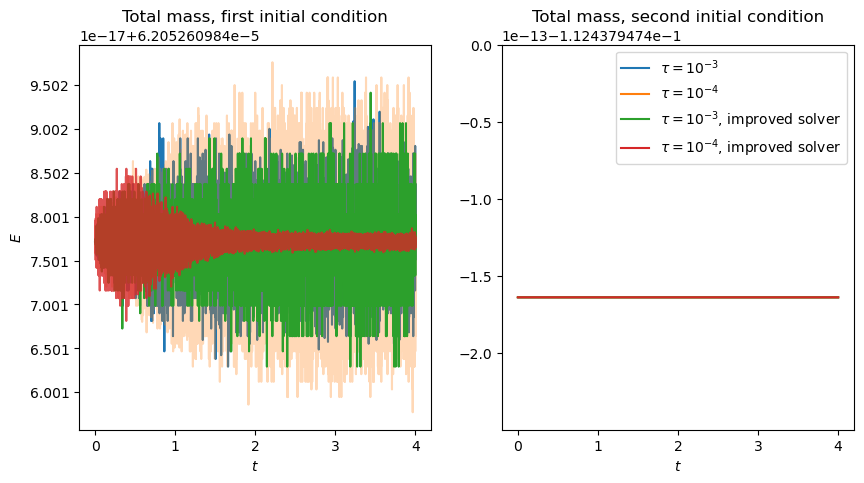

In [455]:
#Genererer plott over total masse
fig, axs = plt.subplots(1,2, figsize=(10,5))

#Første U0
axs[0].plot(tll,m_fll,label=r'$\tau = 10^{-3}$',alpha=1)
axs[0].plot(tlk,m_flk,label=r'$\tau = 10^{-4}$',alpha=0.3)
axs[0].plot(tll,m_fll_imp,label=r'$\tau = 10^{-3}$, improved solver',alpha=1)
axs[0].plot(tlk,m_flk_imp,label=r'$\tau = 10^{-4}$, improved solver',alpha=0.8)
axs[0].set_title('Total mass, first initial condition')

#Andre U0
axs[1].plot(tll,m_sll,label=r'$\tau = 10^{-3}$')
axs[1].plot(tlk,m_slk,label=r'$\tau = 10^{-4}$')
axs[1].plot(tll,m_sll_imp,label=r'$\tau = 10^{-3}$, improved solver')
axs[1].plot(tlk,m_slk_imp,label=r'$\tau = 10^{-4}$, improved solver')
axs[1].set_title('Total mass, second initial condition')

axs[0].set(xlabel=r'$t$', ylabel=r'$E$')
axs[1].set(xlabel=r'$t$')

axs[1].set(ylim=(-0.1124379473-90.25e-12,-0.1124379473-90e-12))

plt.legend(); plt.show()

In [629]:
print('Største endring i total masse, første initialverdi:')
print('')
print(f'Tidssteg = 10^-3' + ', enkel løser: ' + f'{max(m_fll)-min(m_fll)}')
print(f'Tidssteg = 10^-4' + ', enkel løser: ' + f'{max(m_flk)-min(m_flk)}')
print(f'Tidssteg = 10^-3' + ', forbedret løser: ' + f'{max(m_fll_imp)-min(m_fll_imp)}')
print(f'Tidssteg = 10^-4' + ', forbedret løser: ' + f'{max(m_flk_imp)-min(m_flk_imp)}')
print('''

''')
print('Største endring i total masse, andre initialverdi:')
print('')
print(f'Tidssteg = 10^-3' + ', enkel løser: ' + f'{max(m_sll)-min(m_sll)}')
print(f'Tidssteg = 10^-4' + ', enkel løser: ' + f'{max(m_slk)-min(m_slk)}')
print(f'Tidssteg = 10^-3' + ', forbedret løser: ' + f'{max(m_sll_imp)-min(m_sll_imp)}')
print(f'Tidssteg = 10^-4' + ', forbedret løser: ' + f'{max(m_slk_imp)-min(m_slk_imp)}')


Største endring i total masse, første initialverdi:

Tidssteg = 10^-3, enkel løser: 3.252606517456513e-17
Tidssteg = 10^-4, enkel løser: 3.9898639947466563e-17
Tidssteg = 10^-3, forbedret løser: 3.122502256758253e-17
Tidssteg = 10^-4, forbedret løser: 1.734723475976807e-17



Største endring i total masse, andre initialverdi:

Tidssteg = 10^-3, enkel løser: 5.551115123125783e-17
Tidssteg = 10^-4, enkel løser: 8.326672684688674e-17
Tidssteg = 10^-3, forbedret løser: 6.938893903907228e-17
Tidssteg = 10^-4, forbedret løser: 9.71445146547012e-17


Plottene over viser hvordan den totale massen i systemet endrer seg med tiden. Vi ser at endringen er minimal i alle tilfeller. Den initielle massen i tilfellet $u_0(x,y) = 0.05$rand$(x,y)$ er mindre enn den i tilfellet $u_0(x,y) = -0.45 + 0.05$rand$(x,y)$.

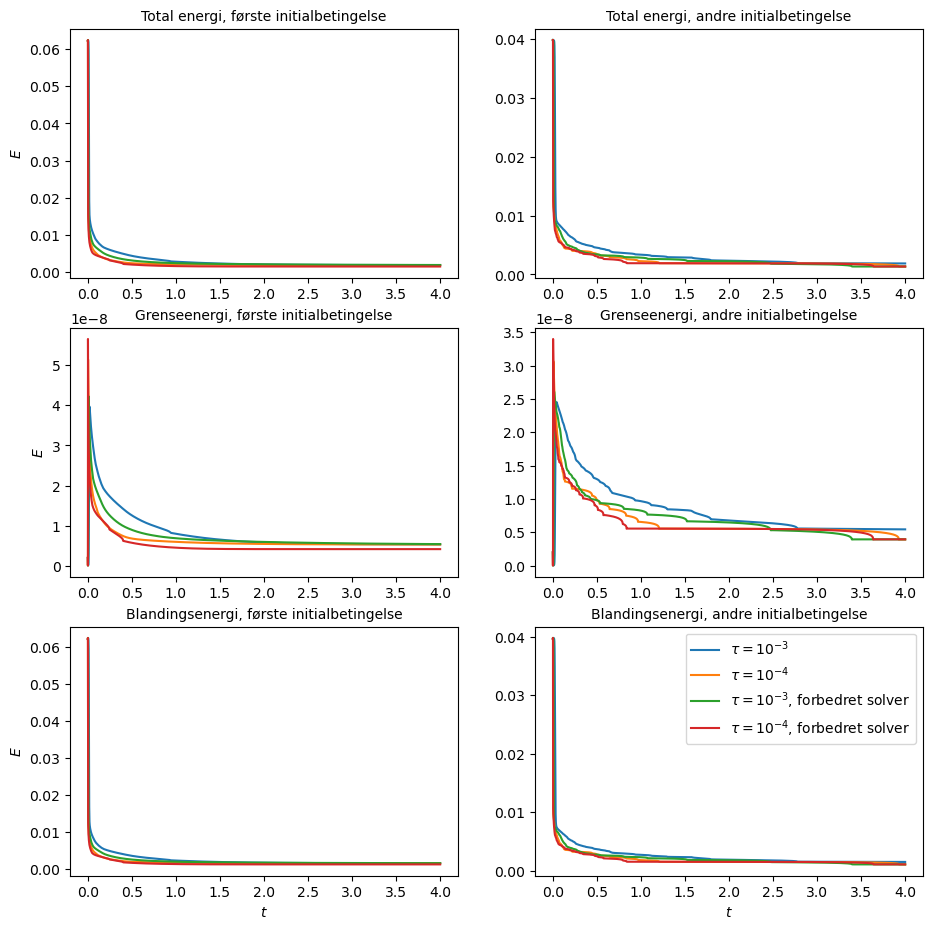

In [634]:
#Genererer plott over energien i systemet
fig, axs = plt.subplots(3,2, figsize=(11,11))

#Total energi, første U0
axs[0,0].plot(tll,Etot_fll,label=r'$\tau = 10^{-3}$')
axs[0,0].plot(tlk,Etot_flk,label=r'$\tau = 10^{-4}$')
axs[0,0].plot(tll,Etot_fll_imp,label=r'$\tau = 10^{-3}$, forbedret solver')
axs[0,0].plot(tlk,Etot_flk_imp,label=r'$\tau = 10^{-4}$, forbedret solver')
axs[0,0].set_title('Total energi, første initialbetingelse', fontsize=10)

#Total energi, andre U0
axs[0,1].plot(tll,Etot_sll,label=r'$\tau = 10^{-3}$')
axs[0,1].plot(tlk,Etot_slk,label=r'$\tau = 10^{-4}$')
axs[0,1].plot(tll,Etot_sll_imp,label=r'$\tau = 10^{-3}$, forbedret solver')
axs[0,1].plot(tlk,Etot_slk_imp,label=r'$\tau = 10^{-4}$, forbedret solver')
axs[0,1].set_title('Total energi, andre initialbetingelse', fontsize=10)

#Grenseenergi, første U0
axs[1,0].plot(tll,Eint_fll,label=r'$\tau = 10^{-3}$')
axs[1,0].plot(tlk,Eint_flk,label=r'$\tau = 10^{-4}$')
axs[1,0].plot(tll,Eint_fll_imp,label=r'$\tau = 10^{-3}$, forbedret solver')
axs[1,0].plot(tlk,Eint_flk_imp,label=r'$\tau = 10^{-4}$, forbedret solver')
axs[1,0].set_title('Grenseenergi, første initialbetingelse', fontsize=10)

#Grenseenergi, andre U0
axs[1,1].plot(tll,Eint_sll,label=r'$\tau = 10^{-3}$')
axs[1,1].plot(tlk,Eint_slk,label=r'$\tau = 10^{-4}$')
axs[1,1].plot(tll,Eint_sll_imp,label=r'$\tau = 10^{-3}$, forbedret solver')
axs[1,1].plot(tlk,Eint_slk_imp,label=r'$\tau = 10^{-4}$, forbedret solver')
axs[1,1].set_title('Grenseenergi, andre initialbetingelse', fontsize=10)

#Blandingsenergi, første U0
axs[2,0].plot(tll,Emix_fll,label=r'$\tau = 10^{-3}$')
axs[2,0].plot(tlk,Emix_flk,label=r'$\tau = 10^{-4}$')
axs[2,0].plot(tll,Emix_fll_imp,label=r'$\tau = 10^{-3}$, forbedret solver')
axs[2,0].plot(tlk,Emix_flk_imp,label=r'$\tau = 10^{-4}$, forbedret solver')
axs[2,0].set_title('Blandingsenergi, første initialbetingelse', fontsize=10)

#Blandingsenergi, andre U0
axs[2,1].plot(tll,Emix_sll,label=r'$\tau = 10^{-3}$')
axs[2,1].plot(tlk,Emix_slk,label=r'$\tau = 10^{-4}$')
axs[2,1].plot(tll,Emix_sll_imp,label=r'$\tau = 10^{-3}$, forbedret solver')
axs[2,1].plot(tlk,Emix_slk_imp,label=r'$\tau = 10^{-4}$, forbedret solver')
axs[2,1].set_title('Blandingsenergi, andre initialbetingelse', fontsize=10)

for i in range(3):
    axs[i,0].set(ylabel=r'$E$')
    
for i in range(2):
    axs[2,i].set(xlabel=r'$t$')

plt.legend(); plt.show()

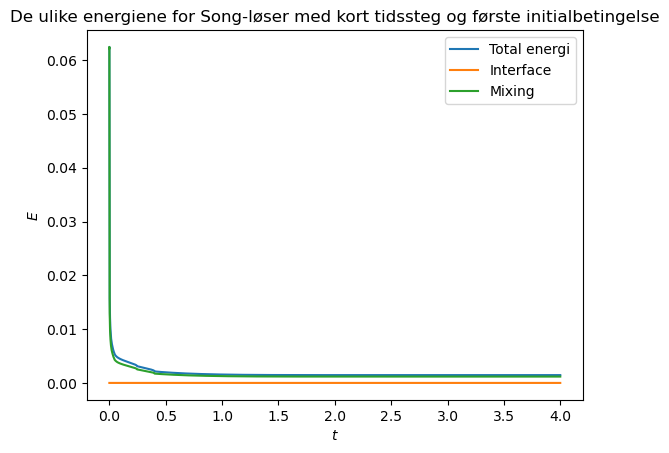

In [632]:
plt.plot(tlk, Etot_flk_imp, label='Total energi')
plt.plot(tlk, Eint_flk_imp, label='Interface')
plt.plot(tlk, Emix_flk_imp, label='Mixing')
plt.xlabel(r'$t$'); plt.ylabel(r'$E$')
plt.title('De ulike energiene for Song-løser med kort tidssteg og første initialbetingelse')
plt.legend(); plt.show()

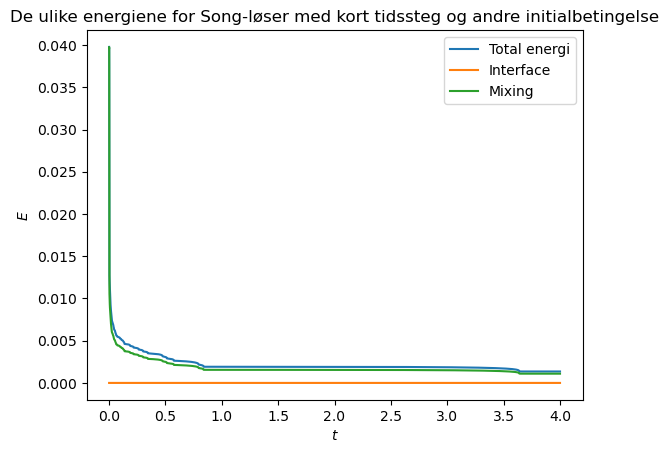

In [633]:
plt.plot(tlk, Etot_slk_imp, label='Total energi')
plt.plot(tlk, Eint_slk_imp, label='Interface')
plt.plot(tlk, Emix_slk_imp, label='Mixing')
plt.xlabel(r'$t$'); plt.ylabel(r'$E$')
plt.title('De ulike energiene for Song-løser med kort tidssteg og andre initialbetingelse')
plt.legend(); plt.show()

Energiplottene over viser en klar trend der energien i all hovedsak faller raskest for et kort tidssteg og for Song-løseren, og energien faller raskere for den enkle løseren med kort tidssteg enn det den gjør for Song-løseren med langt tidssteg. Den som skiller seg mest ut er den enkle løseren med det lange tidssteget. Altså er Song-løseren mindre følsom for langt tidsskritt.

Vi legger merke til at energien som ligger i grenseflaten mellom de to fasene (interface energy) ikke synker like fort for den andre initialbetingelsen som for den første. Dette tyder på at vi her har et større totalareal, og dermed flere adskilte områder, sent i prosessen. Det ser ikke ut til at det er noen markant forskjell på hvordan blandingsenergien (mixing energy) endrer seg med tiden i de to betingelsene.

In [635]:
# #Lager tittel til hver animasjon
# def title_anim(title, html_animation):
#     return f'<div style="text-align:center"><h4>{title}</h4>{html_animation}</div>'

# #Strukturerer animasjonene
# html_grid = f'''
# <table style="width:100%">
#     <tr>
#         <td>{title_anim("First initial condition, τ=10^-3, simple", html_animation_fll)}</td>
#         <td>{title_anim("Second initial condition, τ=10^-3, simple", html_animation_sll)}</td>
#     </tr>
#     <tr>
#         <td>{title_anim("First initial condition, τ=10^-4, simple", html_animation_flk)}</td>
#         <td>{title_anim("Second initial condition, τ=10^-4, simple", html_animation_slk)}</td>
#     </tr>
#     <tr>
#         <td>{title_anim("First initial condition, τ=10^-3, Song", html_animation_fll_imp)}</td>
#         <td>{title_anim("Second initial condition, τ=10^-3, Song", html_animation_sll_imp)}</td>
#     </tr>
#     <tr>
#         <td>{title_anim("First initial condition, τ=10^-4, Song", html_animation_flk_imp)}</td>
#         <td>{title_anim("Second initial condition, τ=10^-4, Song", html_animation_slk_imp)}</td>
#     </tr>
# </table>
# '''

# display(HTML(html_grid))
# plt.close(fig_fll)
# plt.close(fig_flk)
# plt.close(fig_sll)
# plt.close(fig_slk)
# plt.close(fig_fll_imp)
# plt.close(fig_flk_imp)
# plt.close(fig_sll_imp)
# plt.close(fig_slk_imp)

Over er kode for en animasjon for hver kombinasjon av de to initialbetingelsene, de to tidsstegene og de to IMEX-løserne. I alle tilfeller observerer vi flere adskilte områder i animasjonene for andre initialbetingelse enn første, som gjenspeiler den ikke så tregt avtagende grenseenergien i plottet over.

Som nevnt viser plottene over at den totale energien i systemet skal avta betydelig fortere for et kortere tidssteg, spesielt når vi bruker den enkle IMEX-løseren. Igjen kan vi se at animasjonene gjenspeiler dette. Faseseparasjonen med første initialbetingelse, enkel IMEX-løser og kort tidssteg viser minimal utvikling etter $\frac{T}{3}$, mens et langt tidssteg gir en løsning som er i betydelig endring frem til rundt $\frac{T}{2}$, der $T = 4,0$. Altså har den sistnevnte høyere energi senere i prosessen. Sammenligner vi animasjonene av Song-løseren for de ulike tidsstegene, ser vi at her roer prosessen seg ned noenlunde samtidig. Sammenligner vi animasjonene av de to ulike løserne, ser det ut til at hele prosessen går raskere når vi bruker Song.

Dersom vi bruker Song-løseren med det korteste tidssteget, og snapshot fra veldig tidlig i prosessen, kommer vi frem til at "Spinodal decomposition" kun foregår frem til omtrent $t=0,001$, mens "Ostwald ripening" ikke gir seg før rundt $t=0,7$, for den første initialbetingelsen. For den andre har vi "Spinodal decomposition" frem til $t=0,002$ og "Ostwald ripening" frem til $t=2,7$.

![Gif of first initCond](Gif1_fin.gif)
**Figure.** En gif som viser "spinodal decomposition" og påfølgende "Ostwald ripening", for første initialbetingelse.

![Gif of second initCond](Gif2_fin.gif)
**Figure.** En gif som viser "spinodal decomposition" og påfølgende "Ostwald ripening", for andre initialbetingelse.

In [608]:
#Lager gif
Gif1_frames = [snap1[0],snap1[1],snap1[6],snap_flk_imp[1],snap_flk_imp[5],snap_flk_imp[50],snap_flk_imp[-1]]
Gif2_frames = [snap2[0],snap2[10],snap2[15],snap_slk_imp[2],snap_slk_imp[100],snap_slk_imp[150],snap_slk_imp[-1]]

images1 = []
for U in Gif1_frames:
    fig1, ax1 = plt.subplots(figsize=(4, 4))
    im1 = ax1.imshow(U, cmap='RdBu', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
    ax1.axis('off')  # hide axes
    plt.tight_layout()

    buf1 = io.BytesIO()
    plt.savefig(buf1, format='png')
    plt.close(fig1)
    buf1.seek(0)
    images1.append(Image.open(buf1))
    
images2 = []
for U in Gif2_frames:
    fig2, ax2 = plt.subplots(figsize=(4, 4))
    im2 = ax2.imshow(U, cmap='RdBu', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
    ax2.axis('off')  # hide axes
    plt.tight_layout()

    buf2 = io.BytesIO()
    plt.savefig(buf2, format='png')
    plt.close(fig2)
    buf2.seek(0)
    images2.append(Image.open(buf2))


In [609]:
#Lagrer gif
images1[0].save(
    "Gif1_fin.gif",
    save_all=True,
    append_images=images1[1:],
    duration=800,
    loop=0
)

images2[0].save(
    "Gif2_fin.gif",
    save_all=True,
    append_images=images2[1:],
    duration=800,
    loop=0
)